# PCA & Clustering — Wine Dataset
This notebook solves all tasks exactly as specified in **PCA.docx**.

## Task 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/mnt/data/wine (1).csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


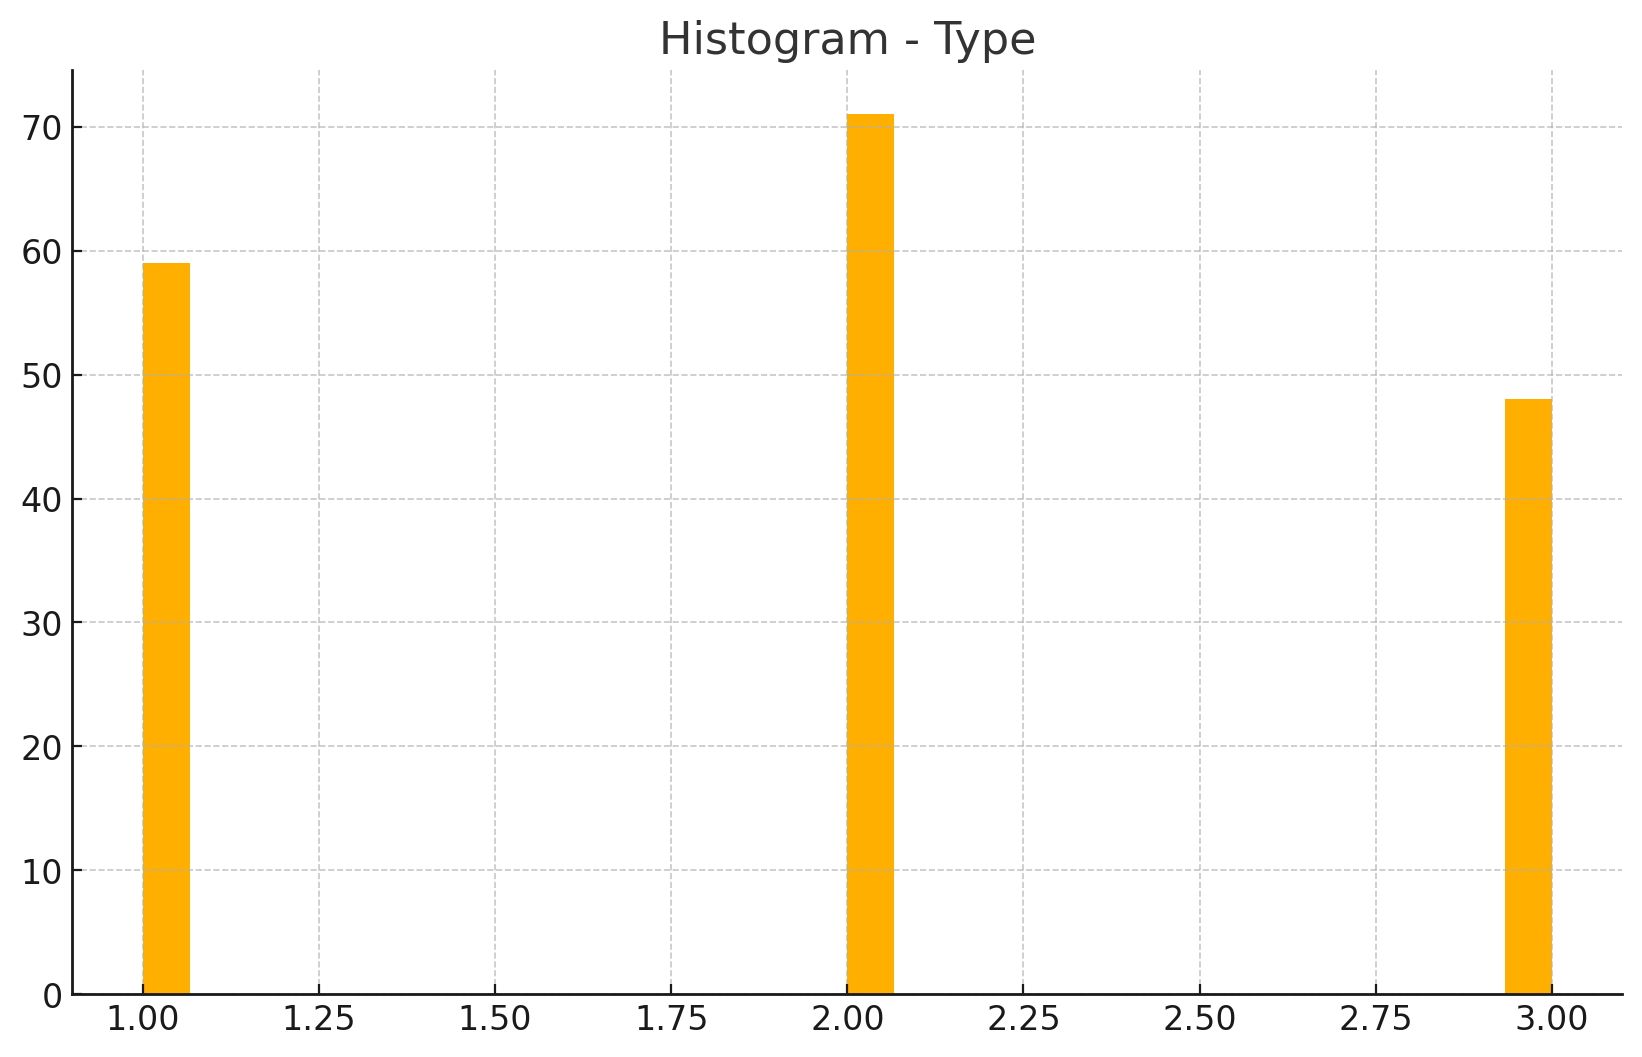

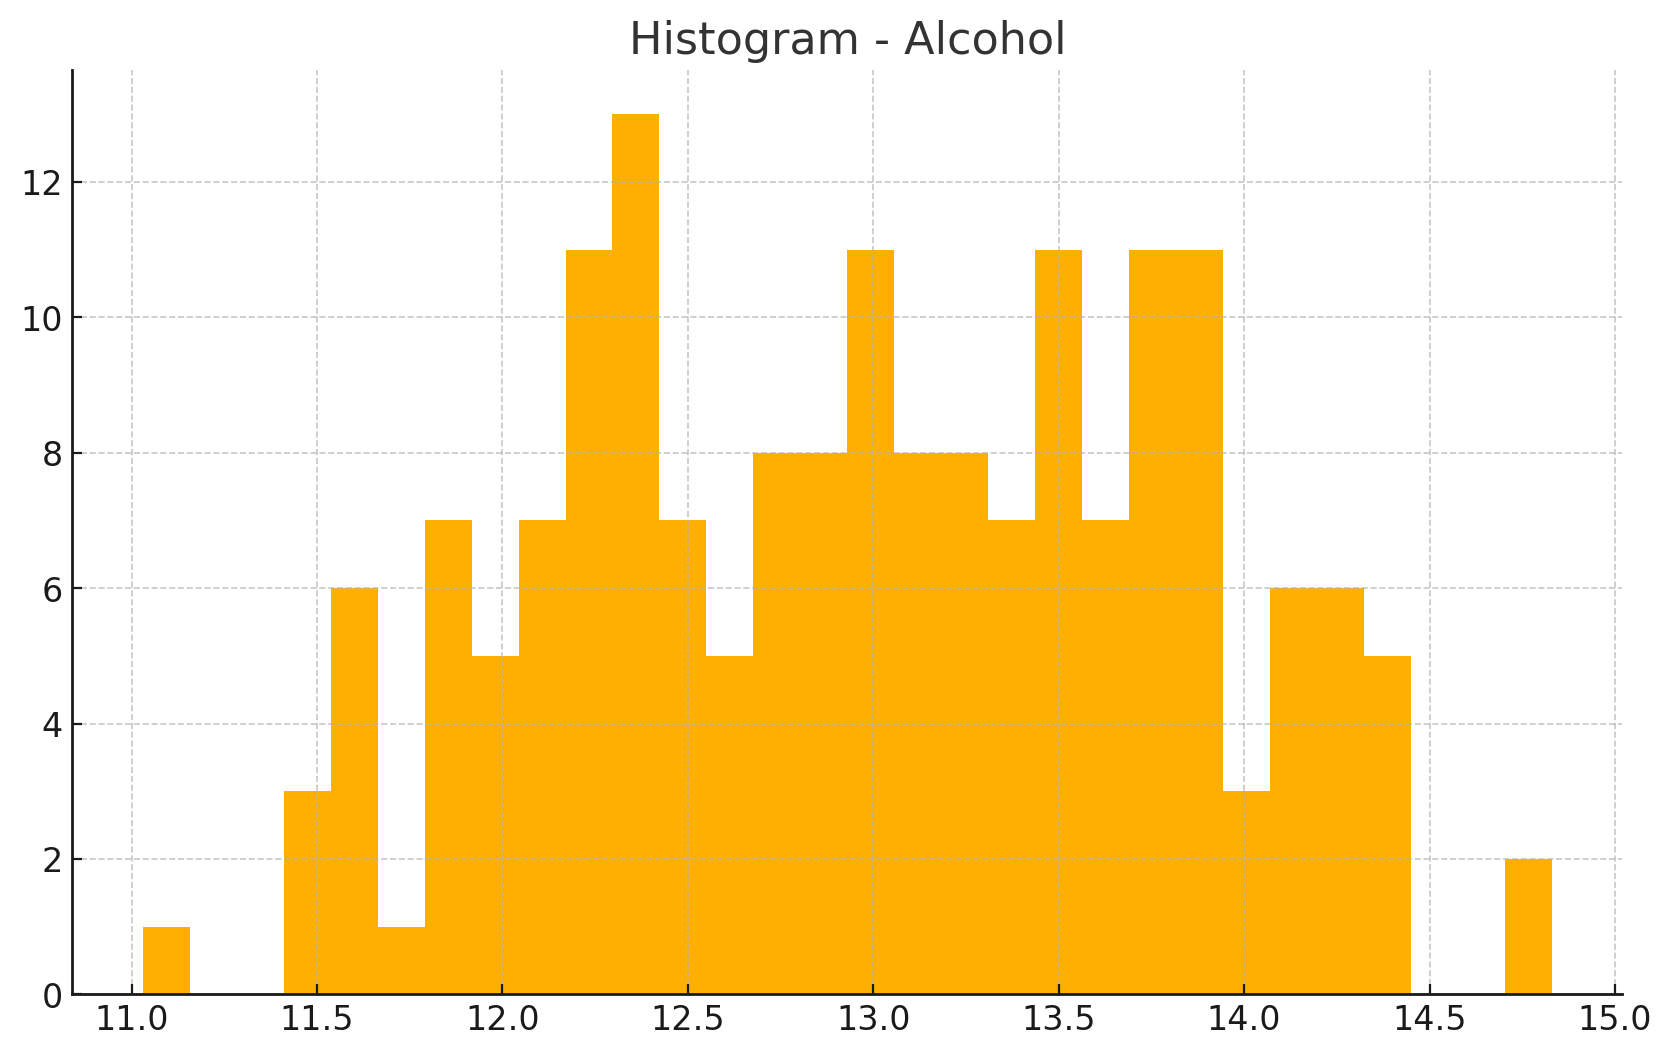

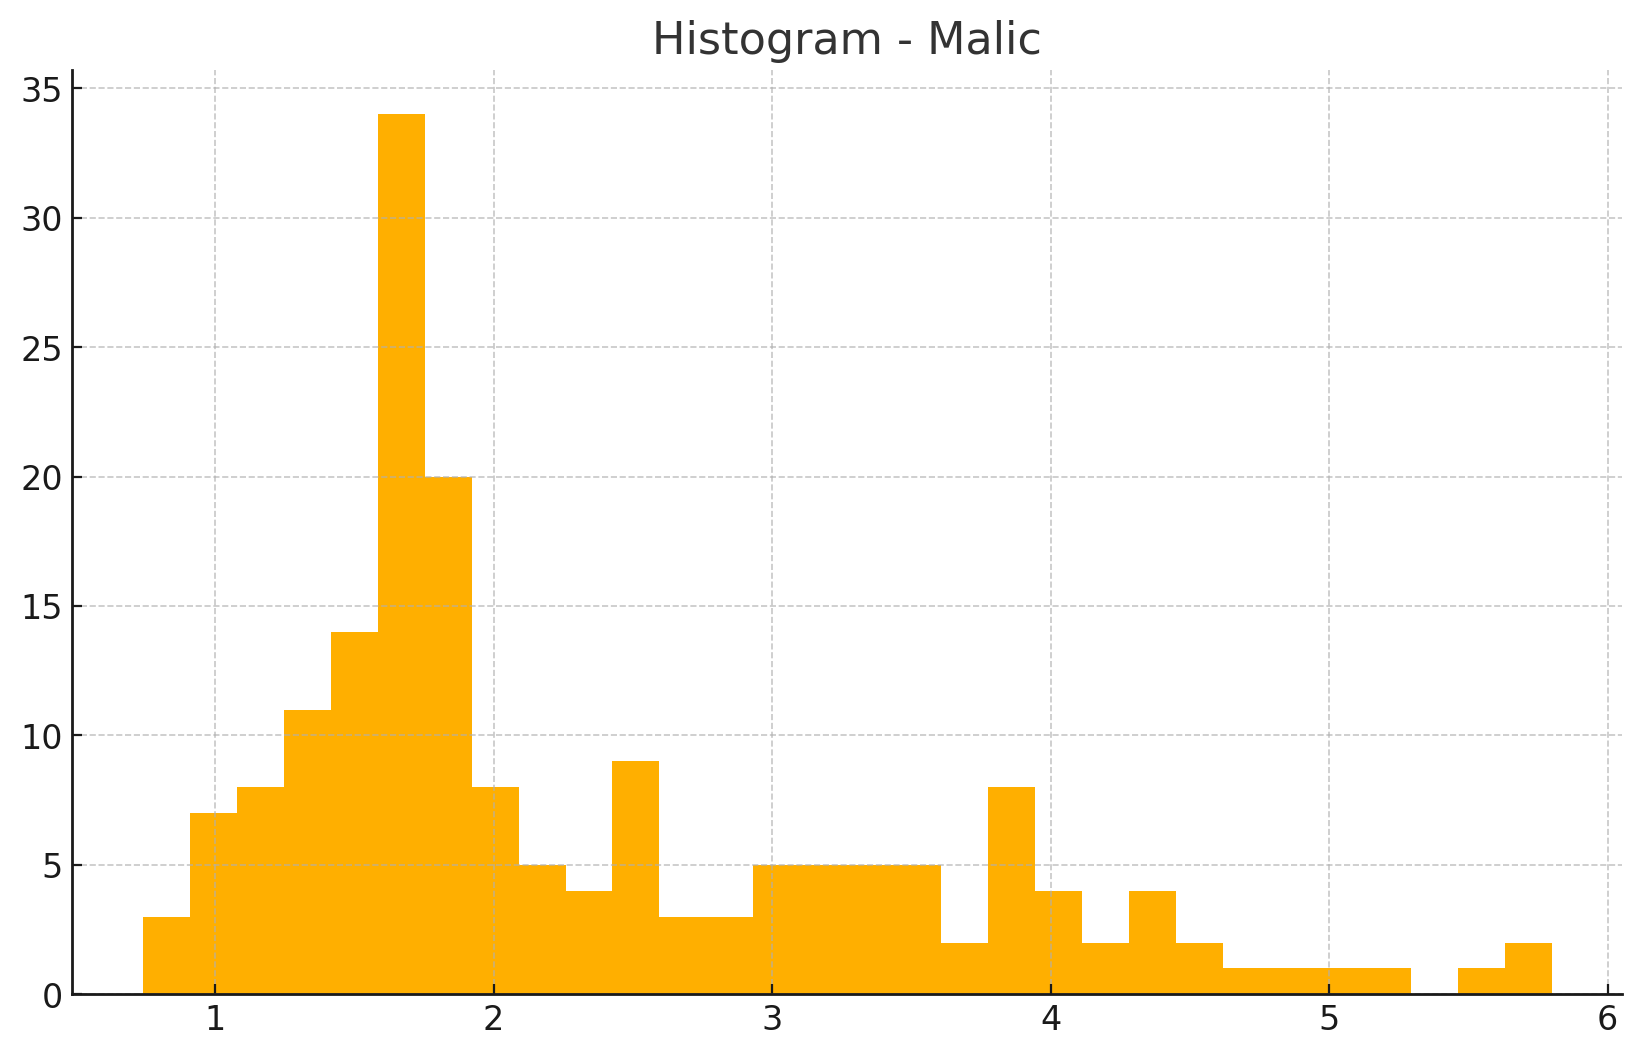

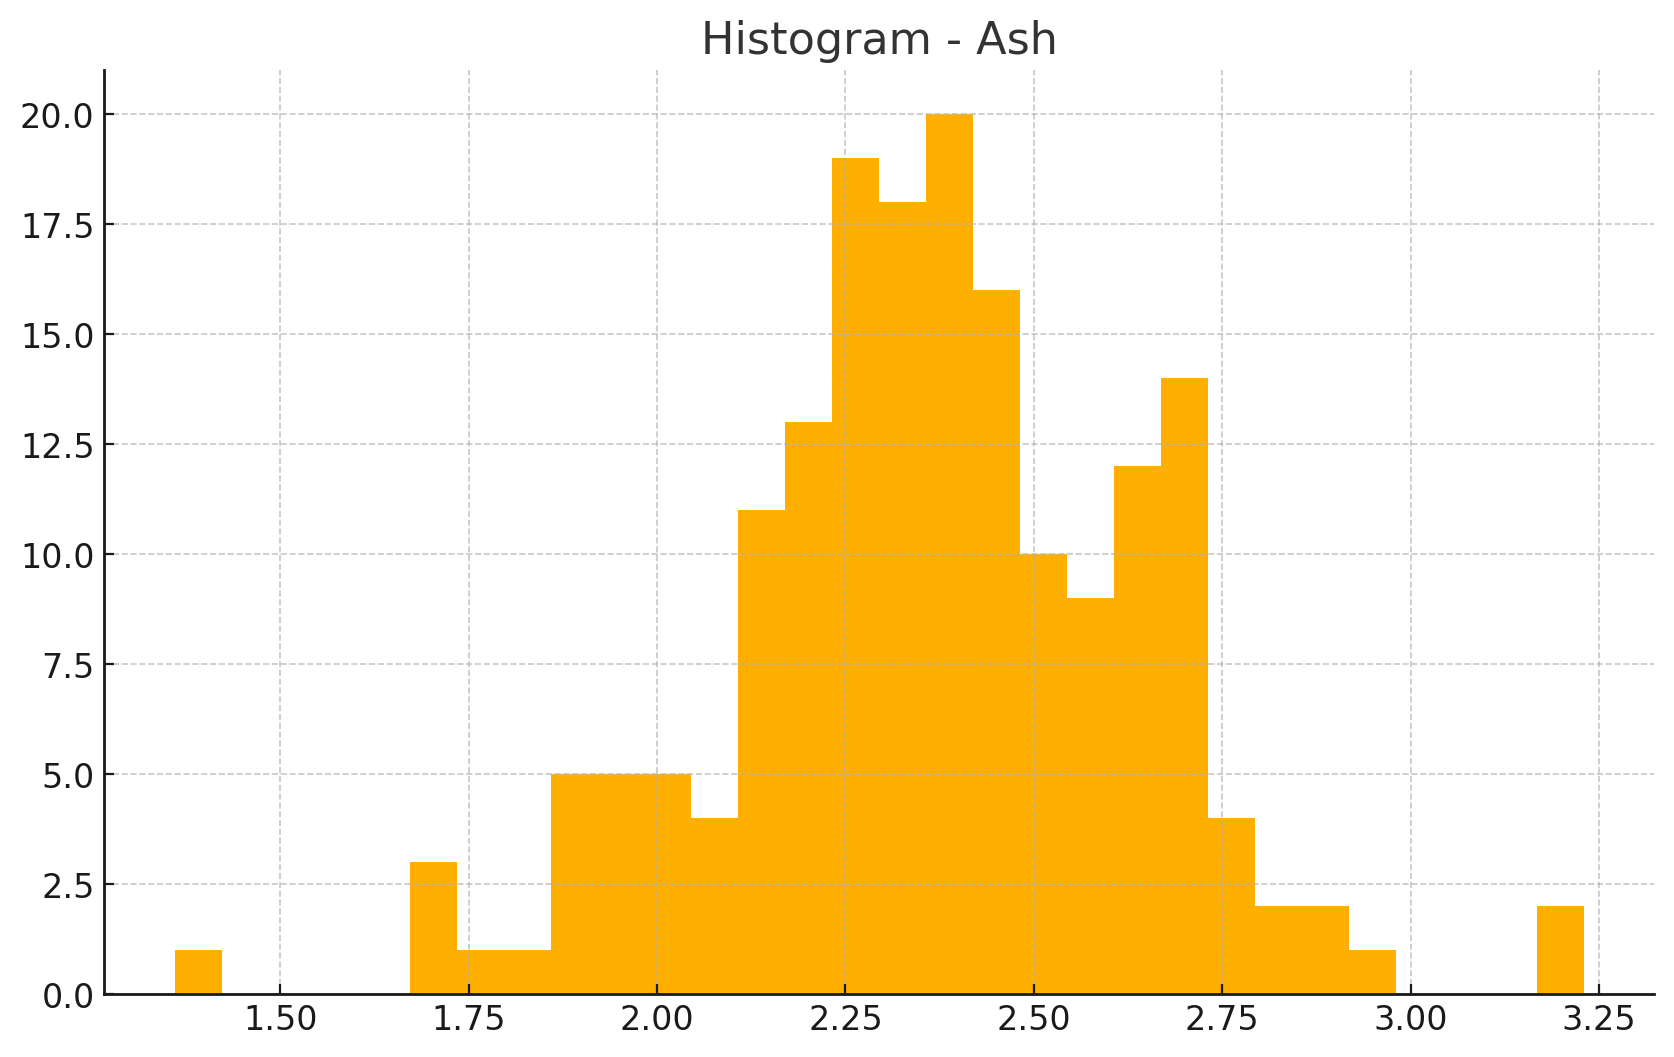

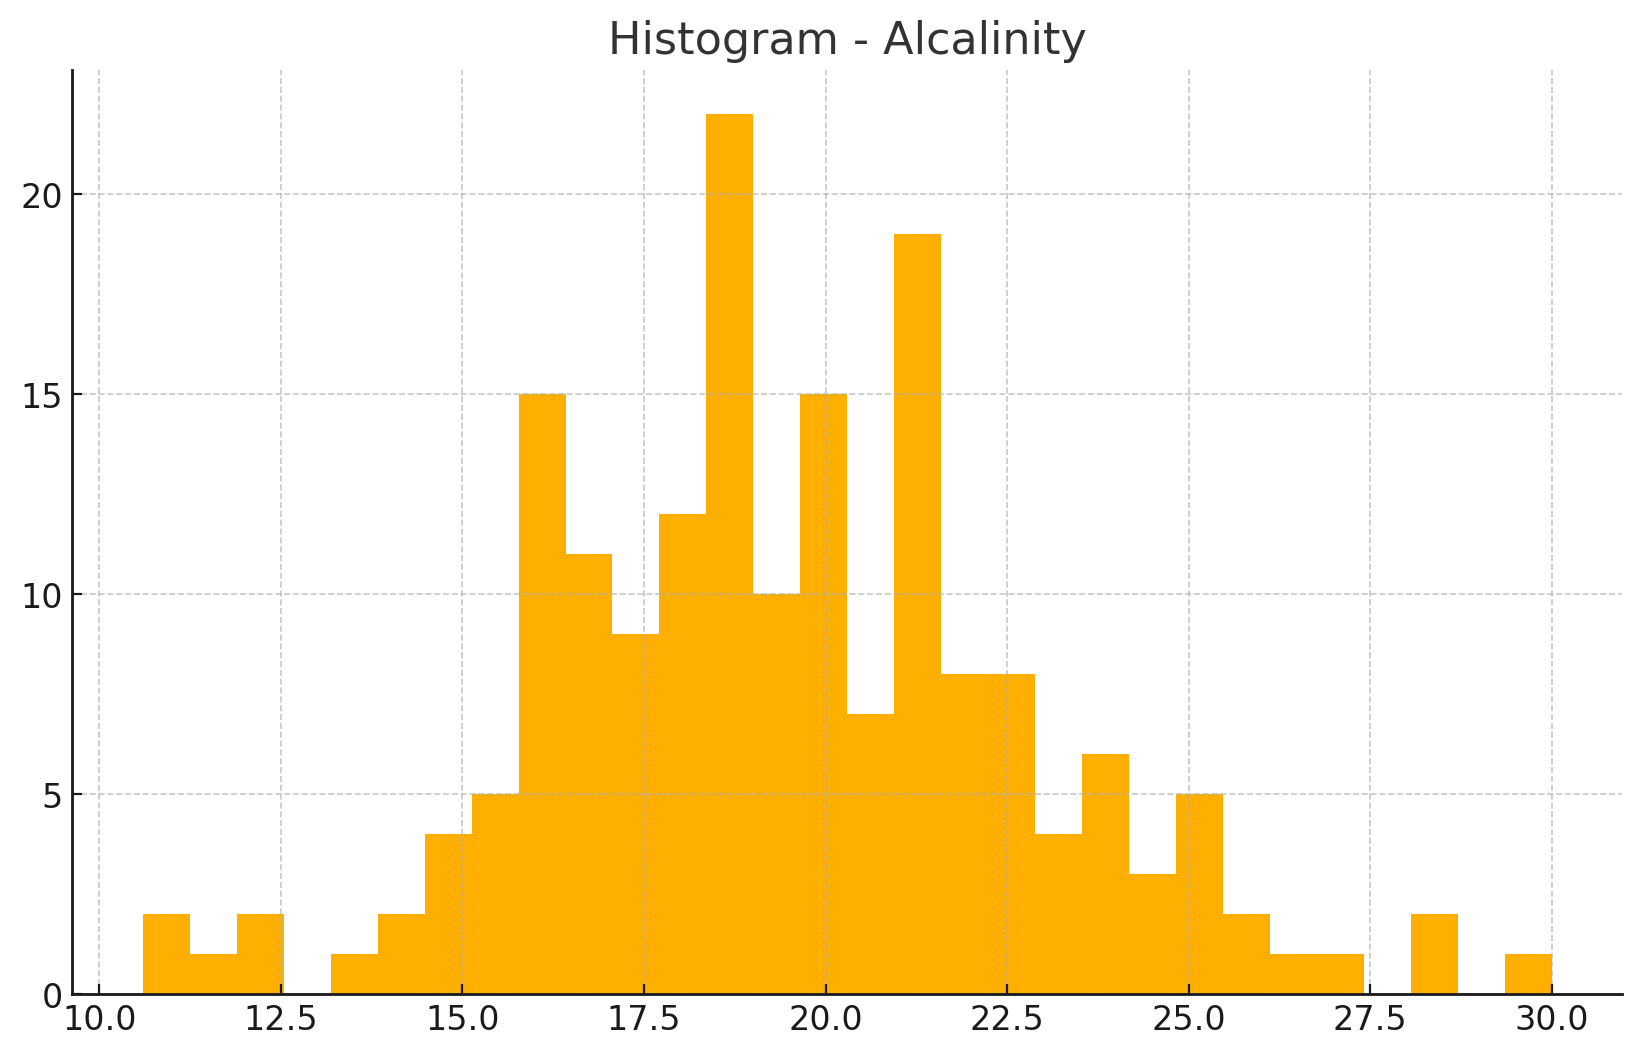

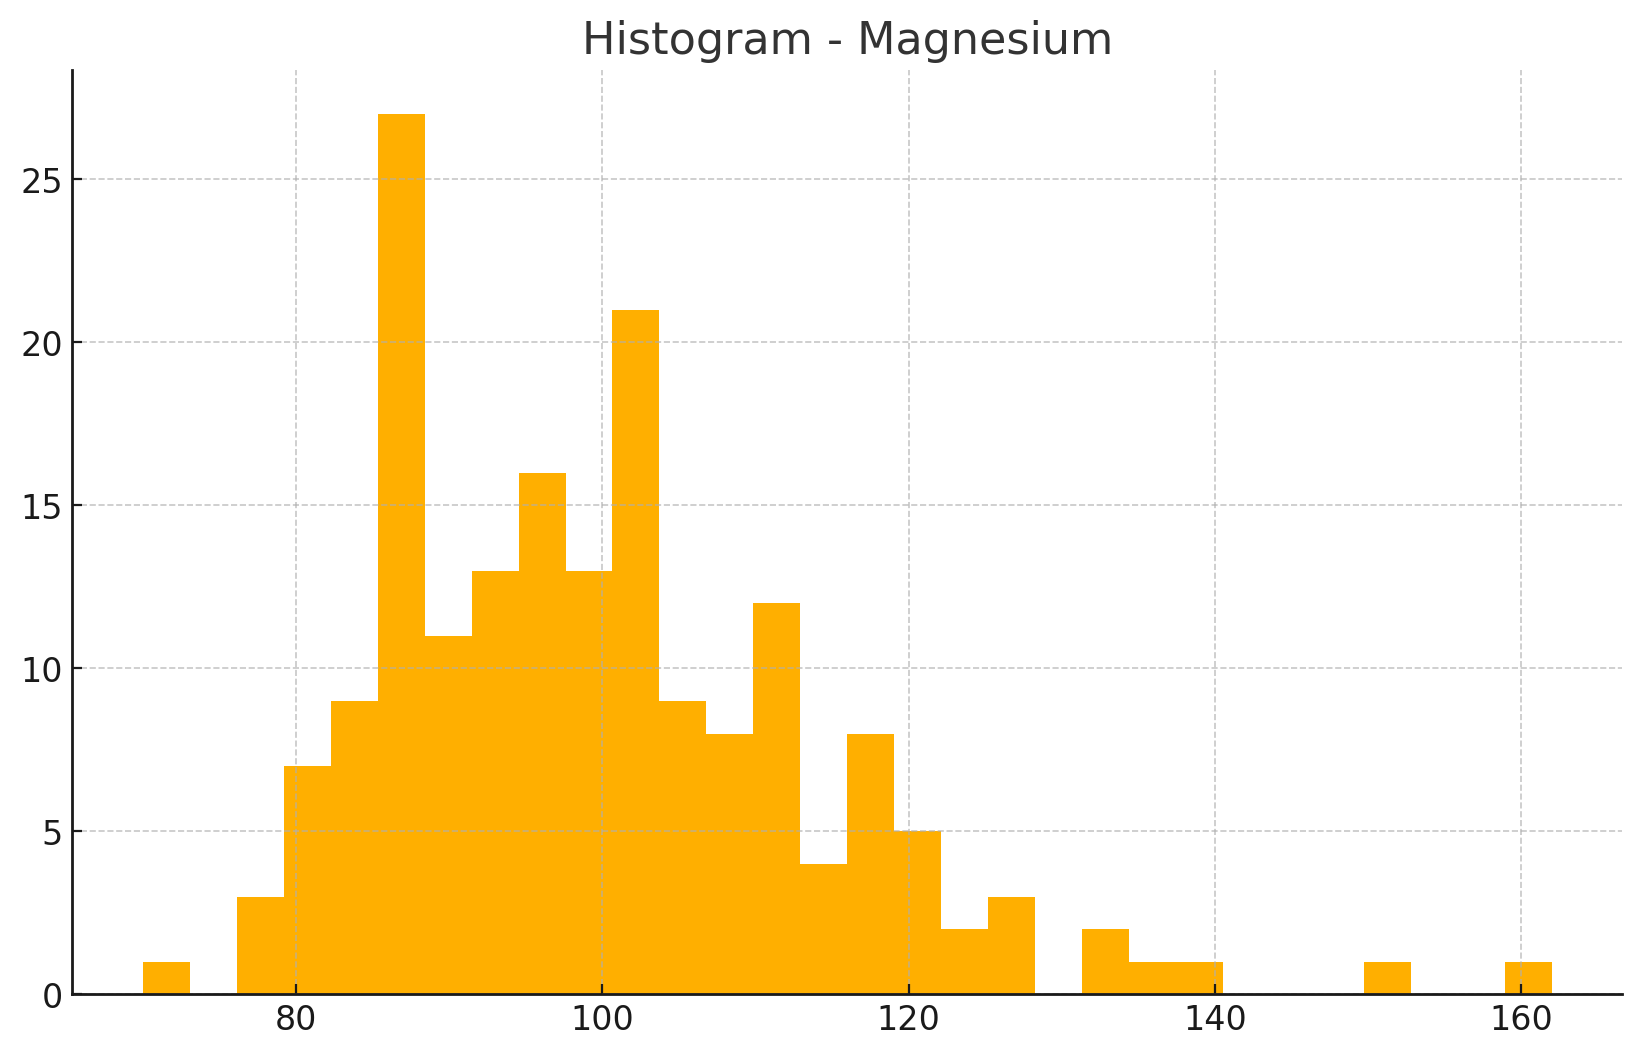

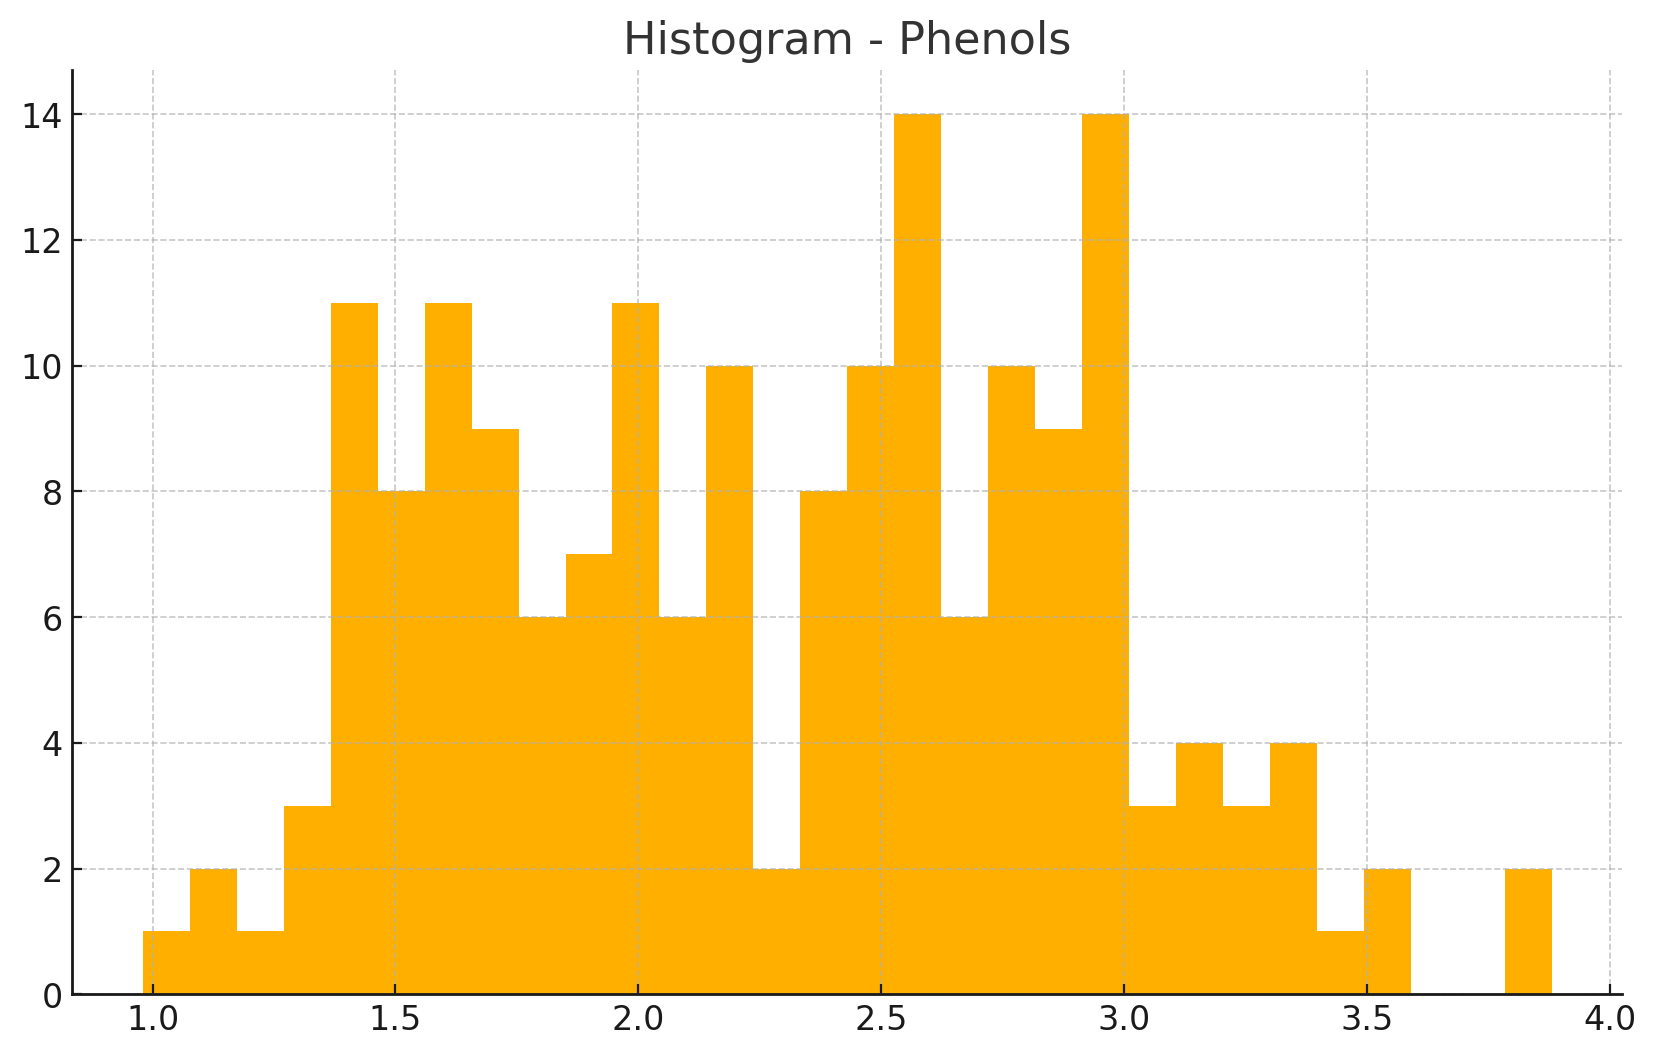

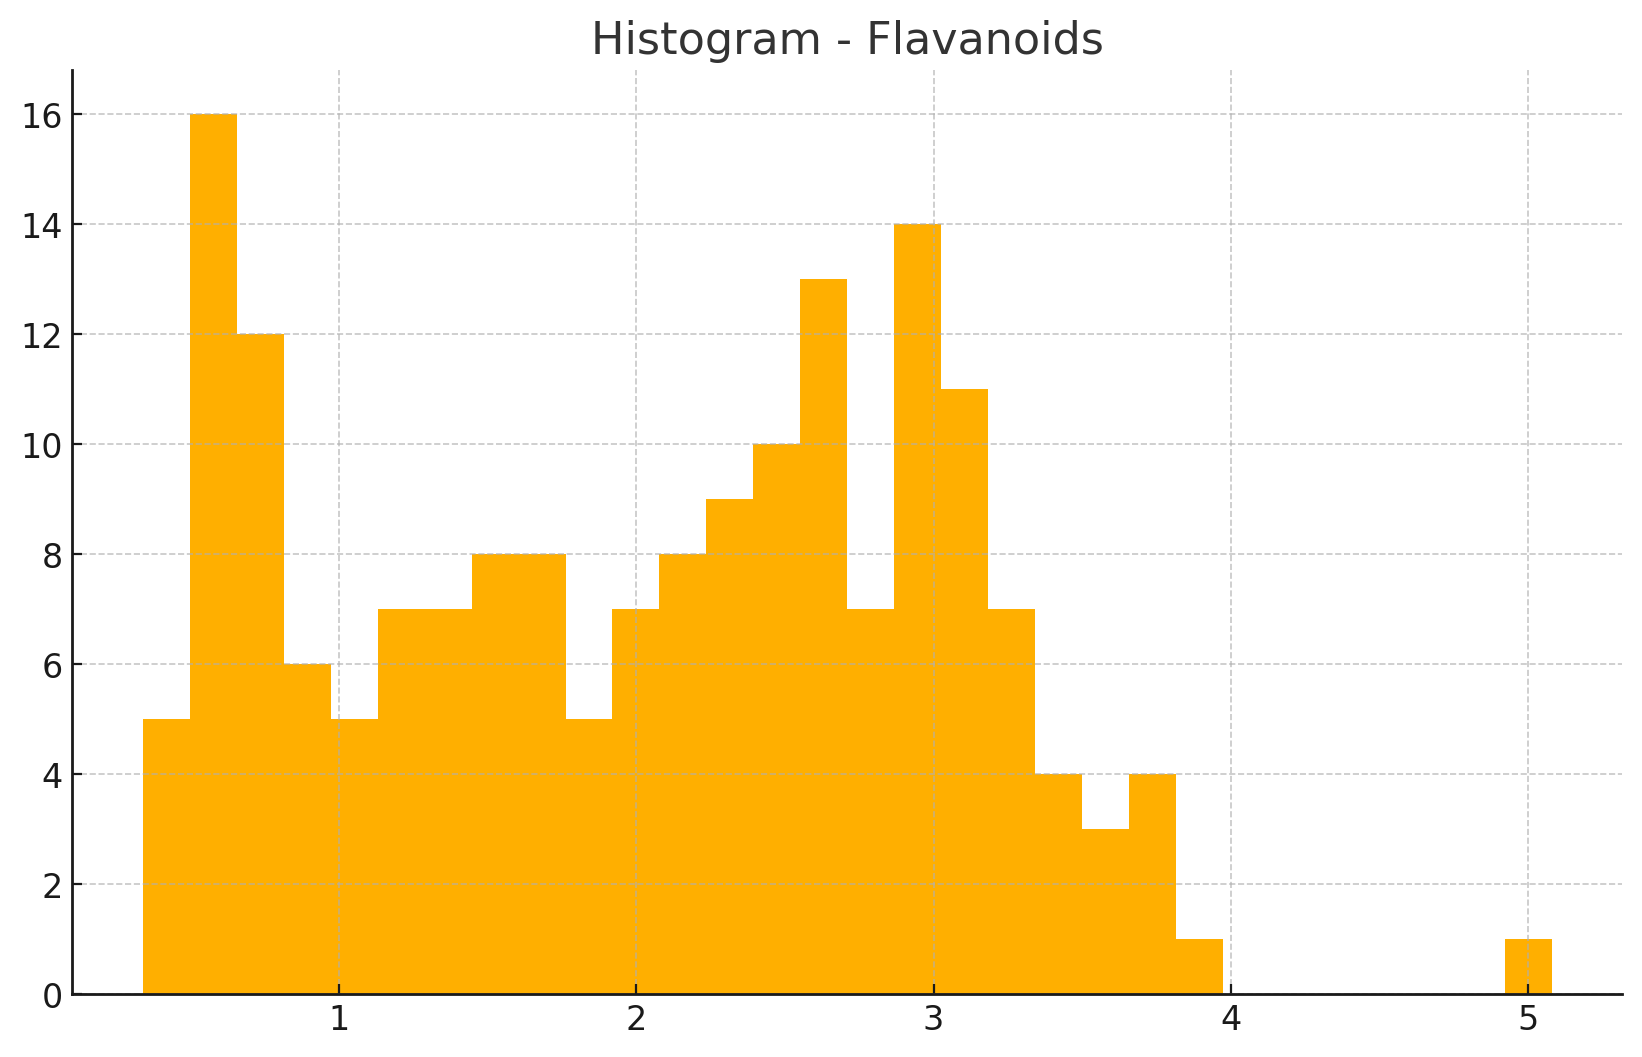

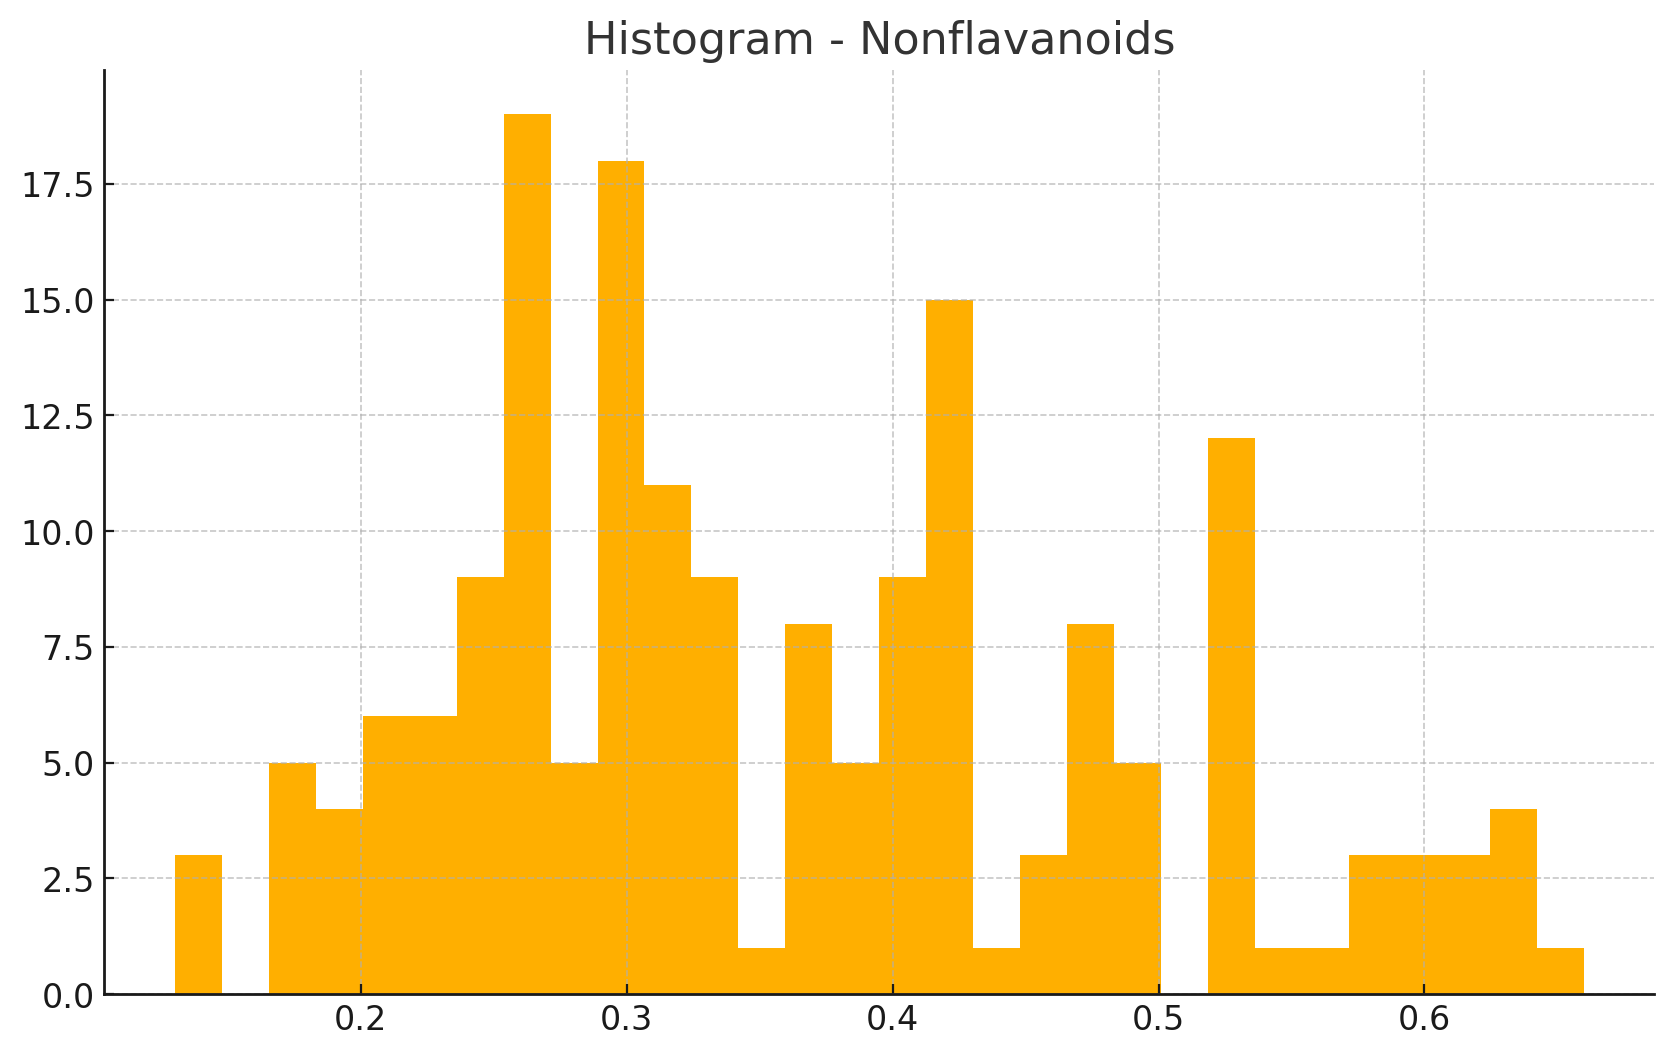

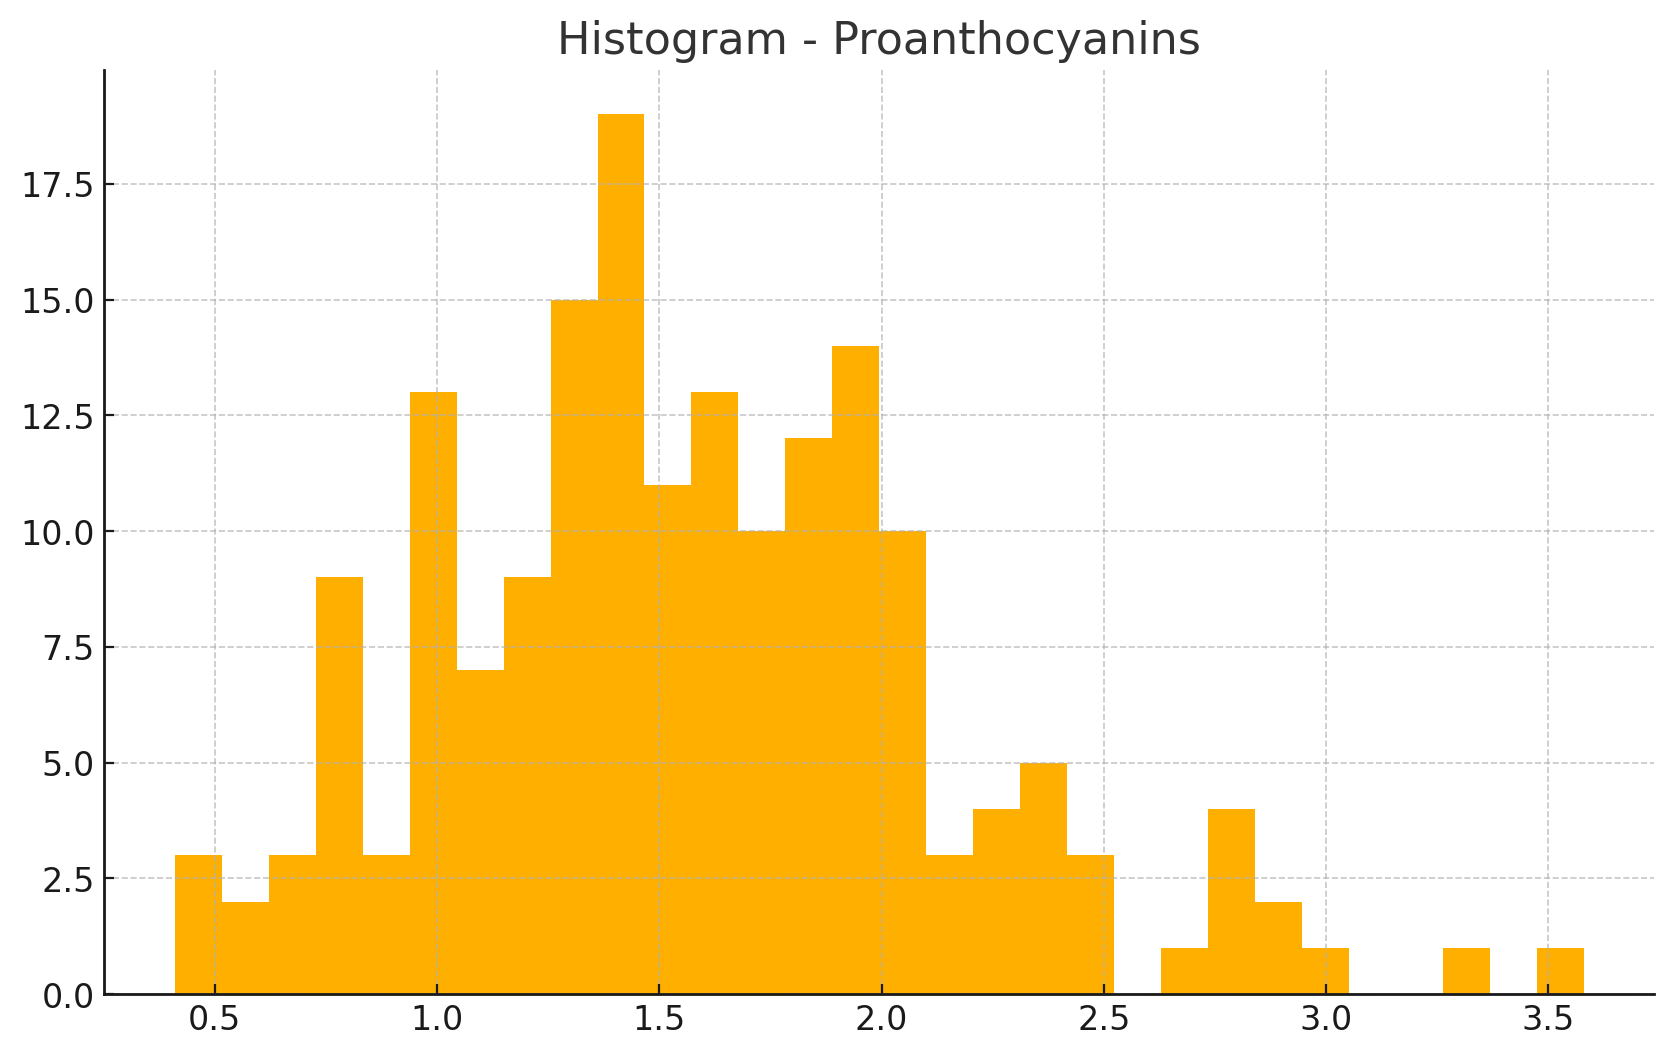

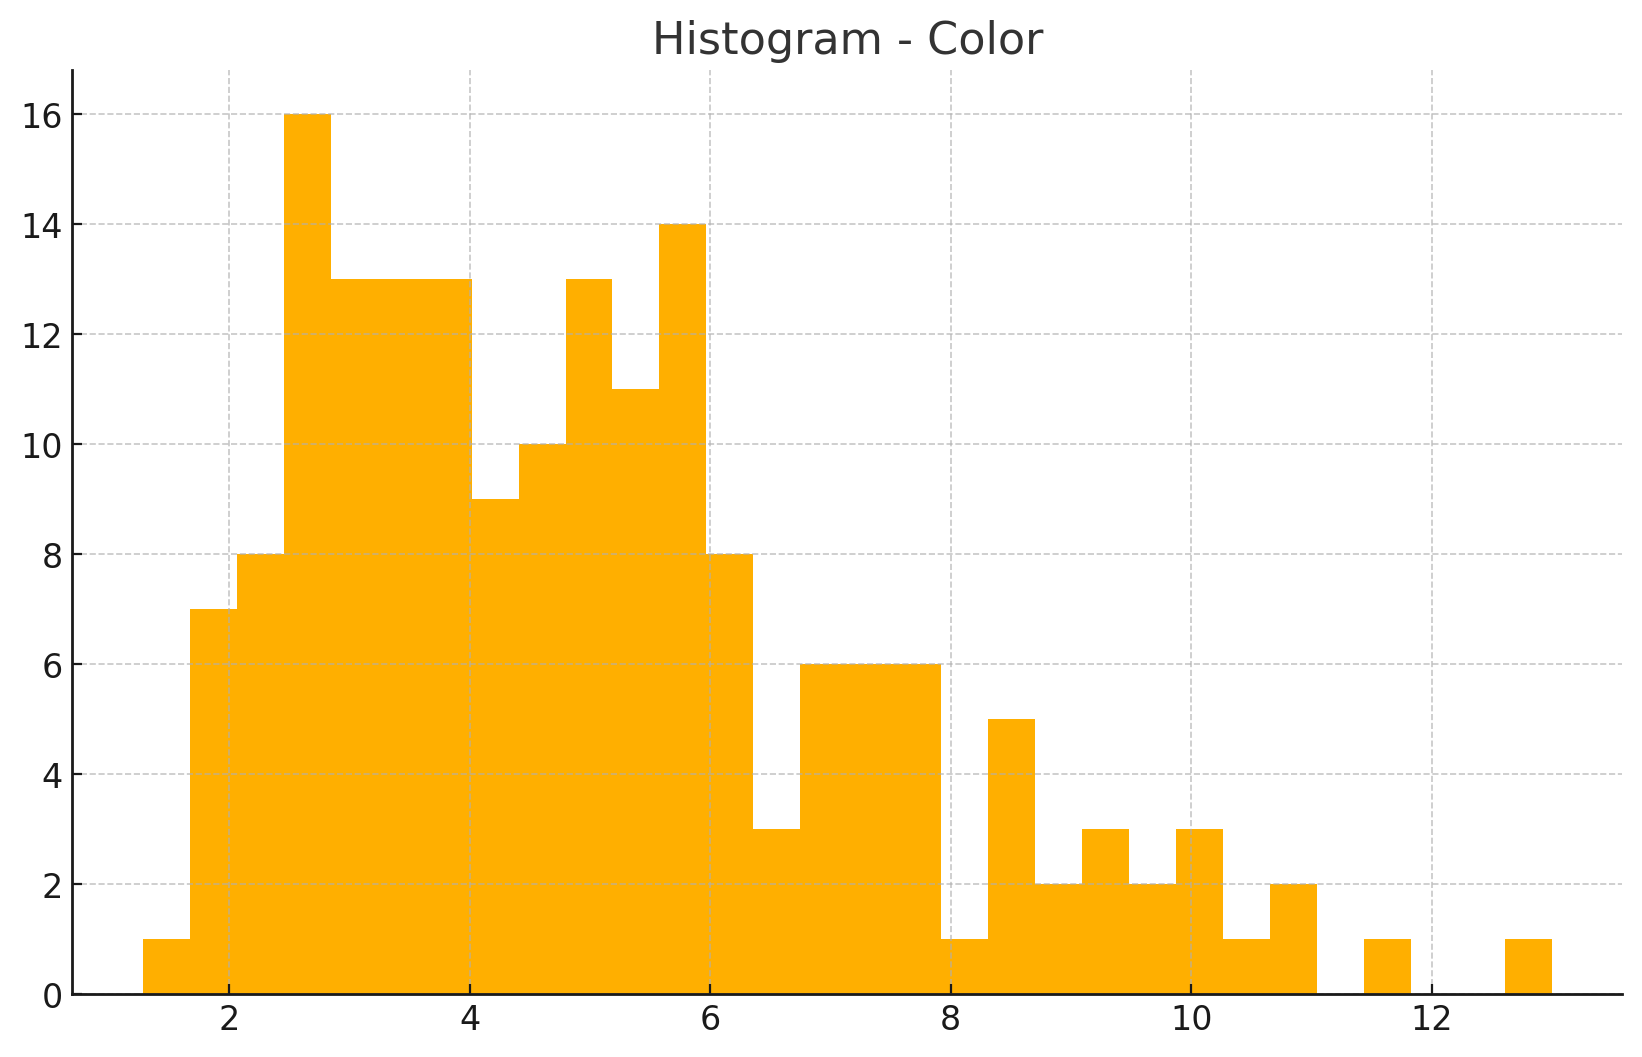

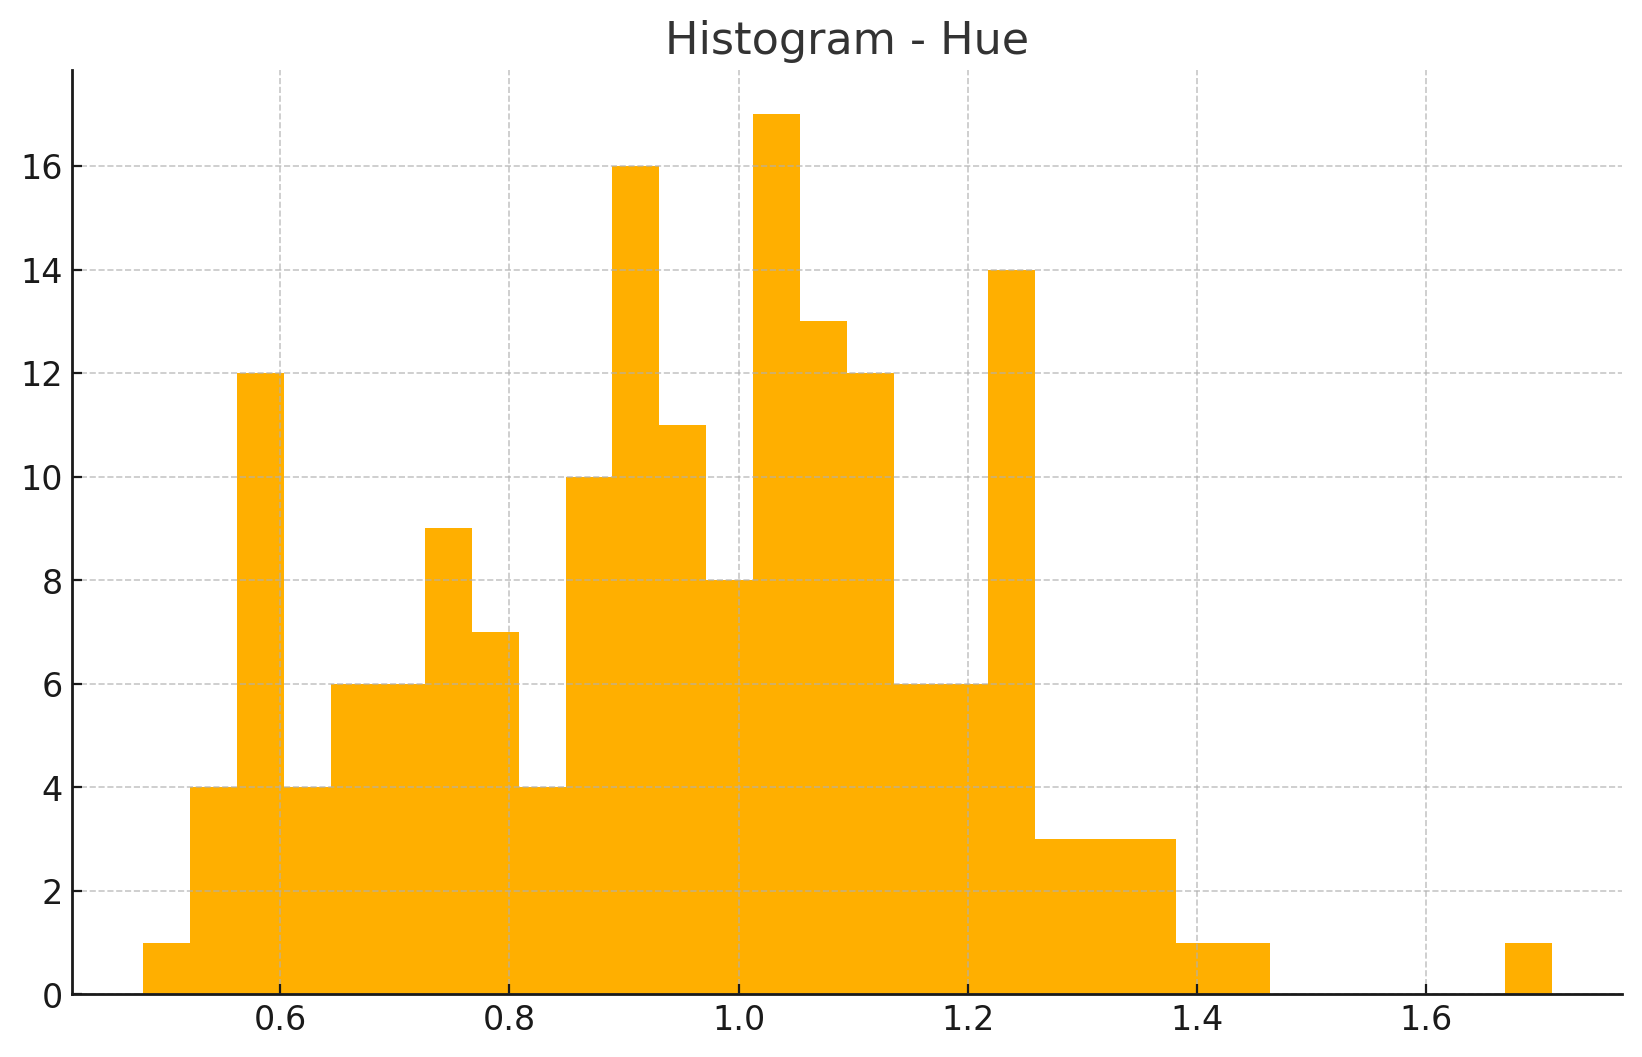

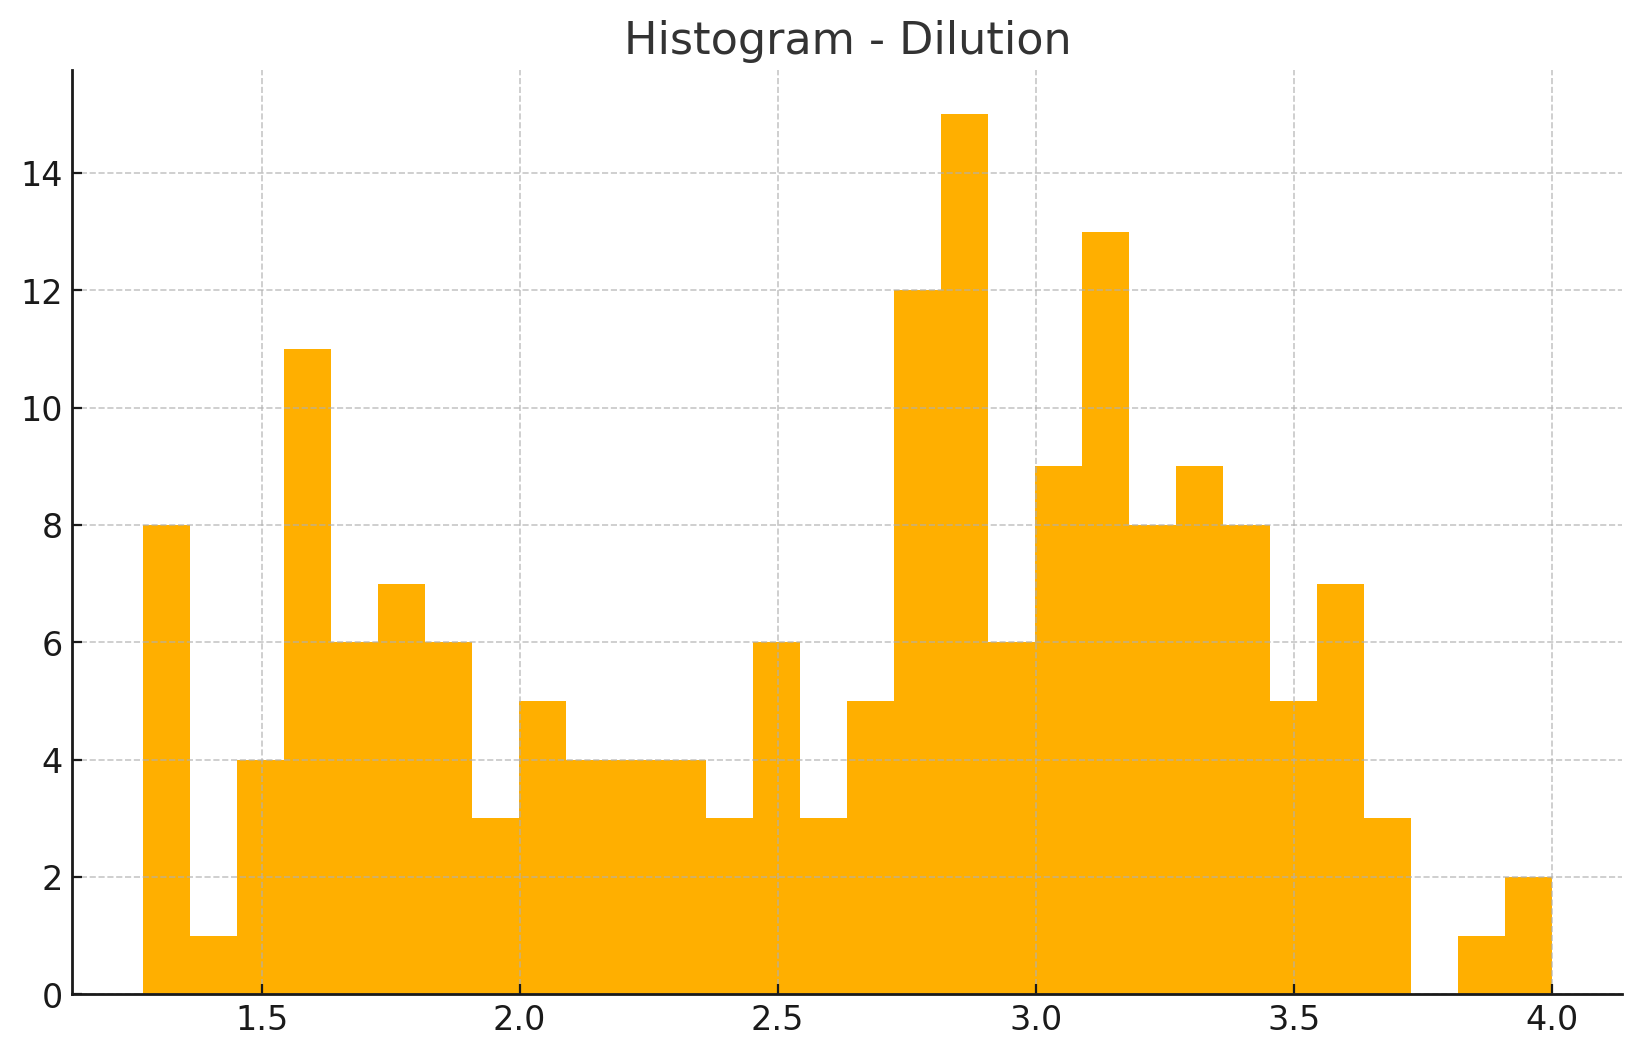

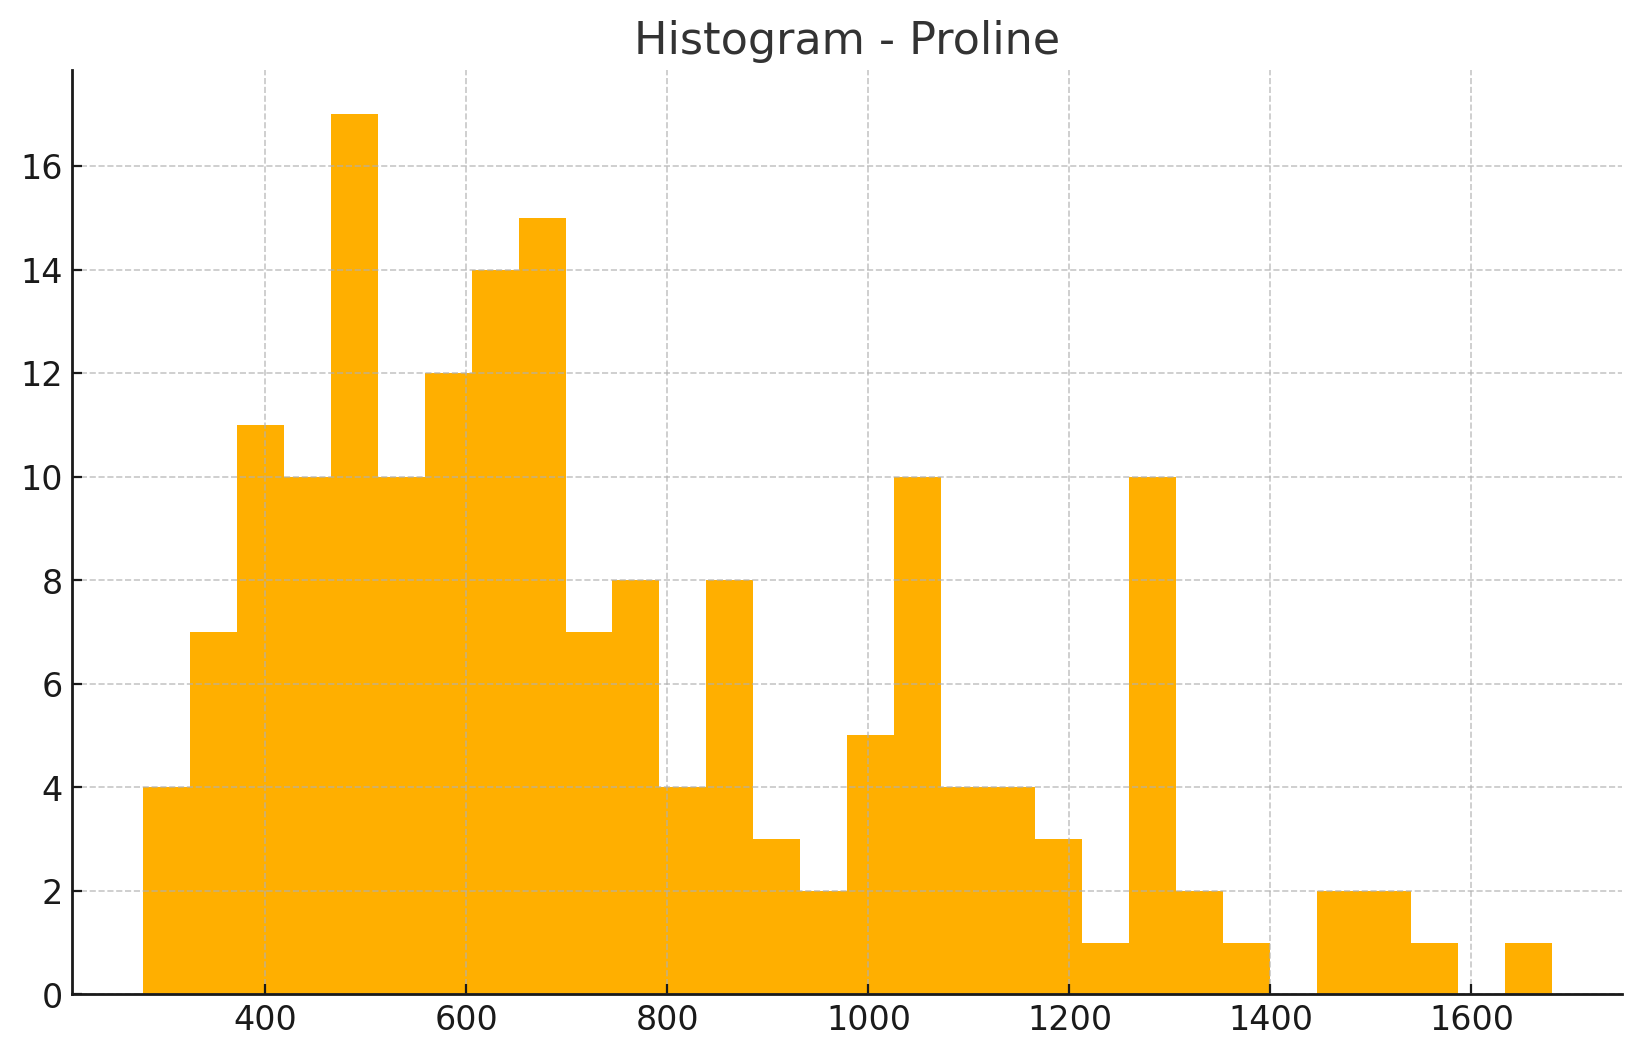

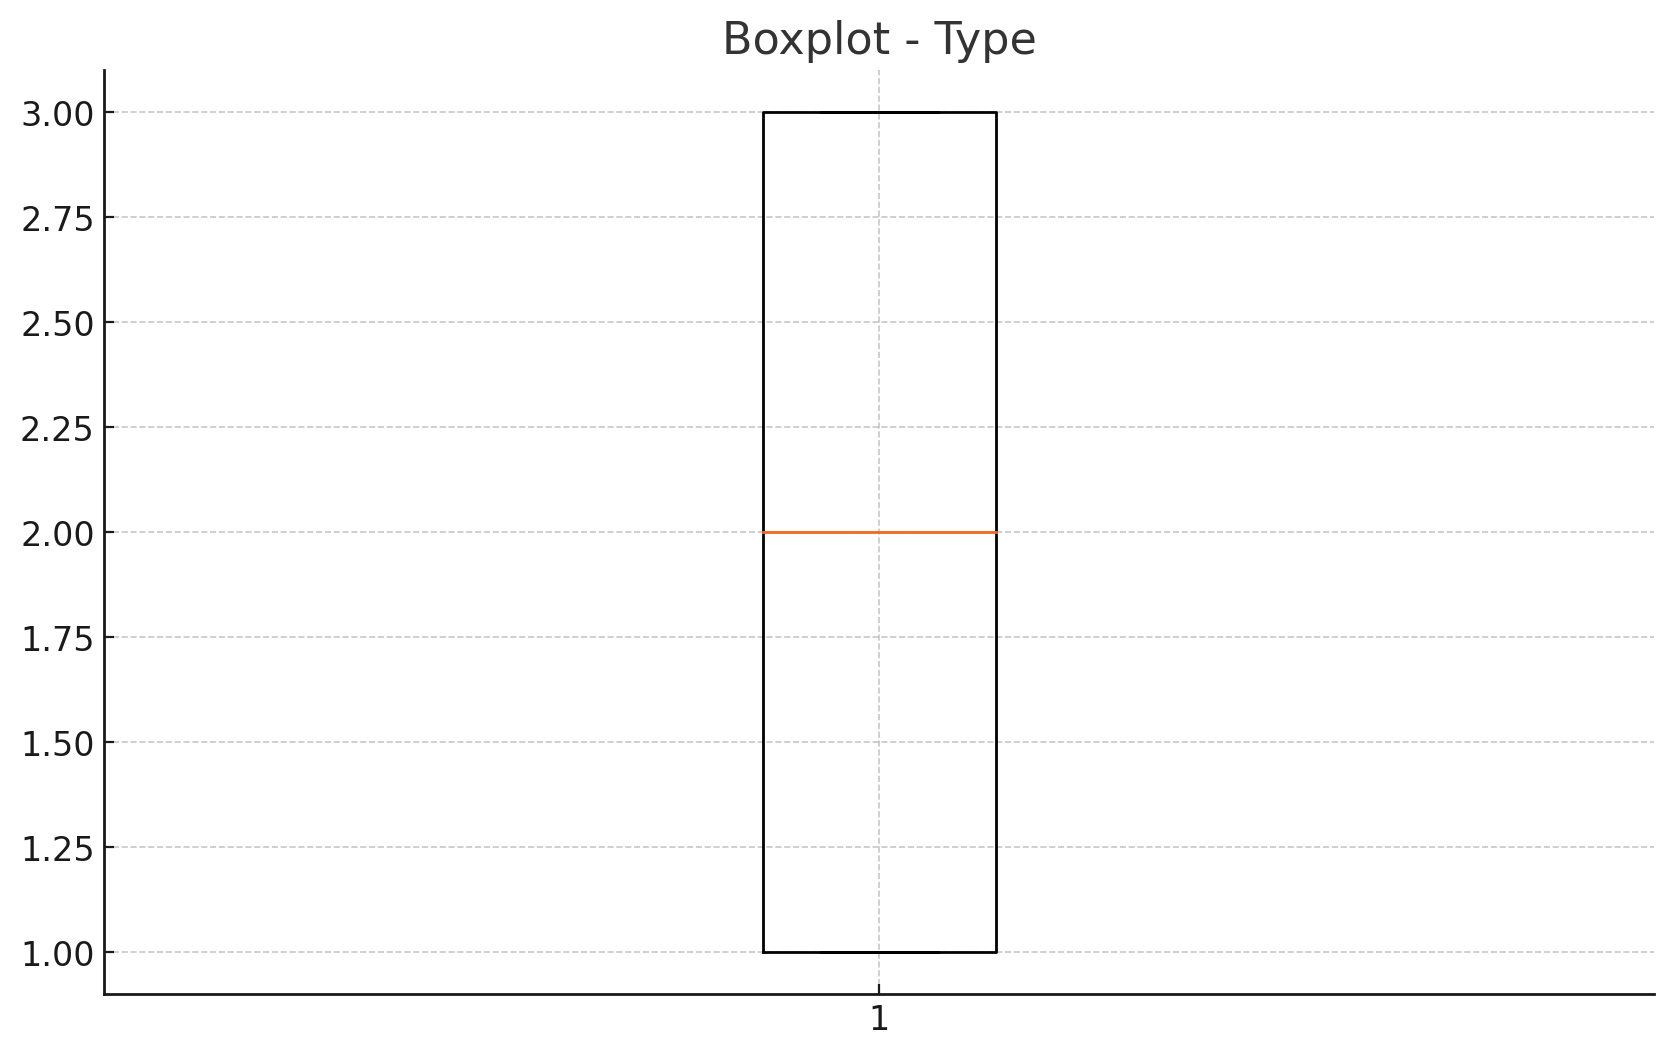

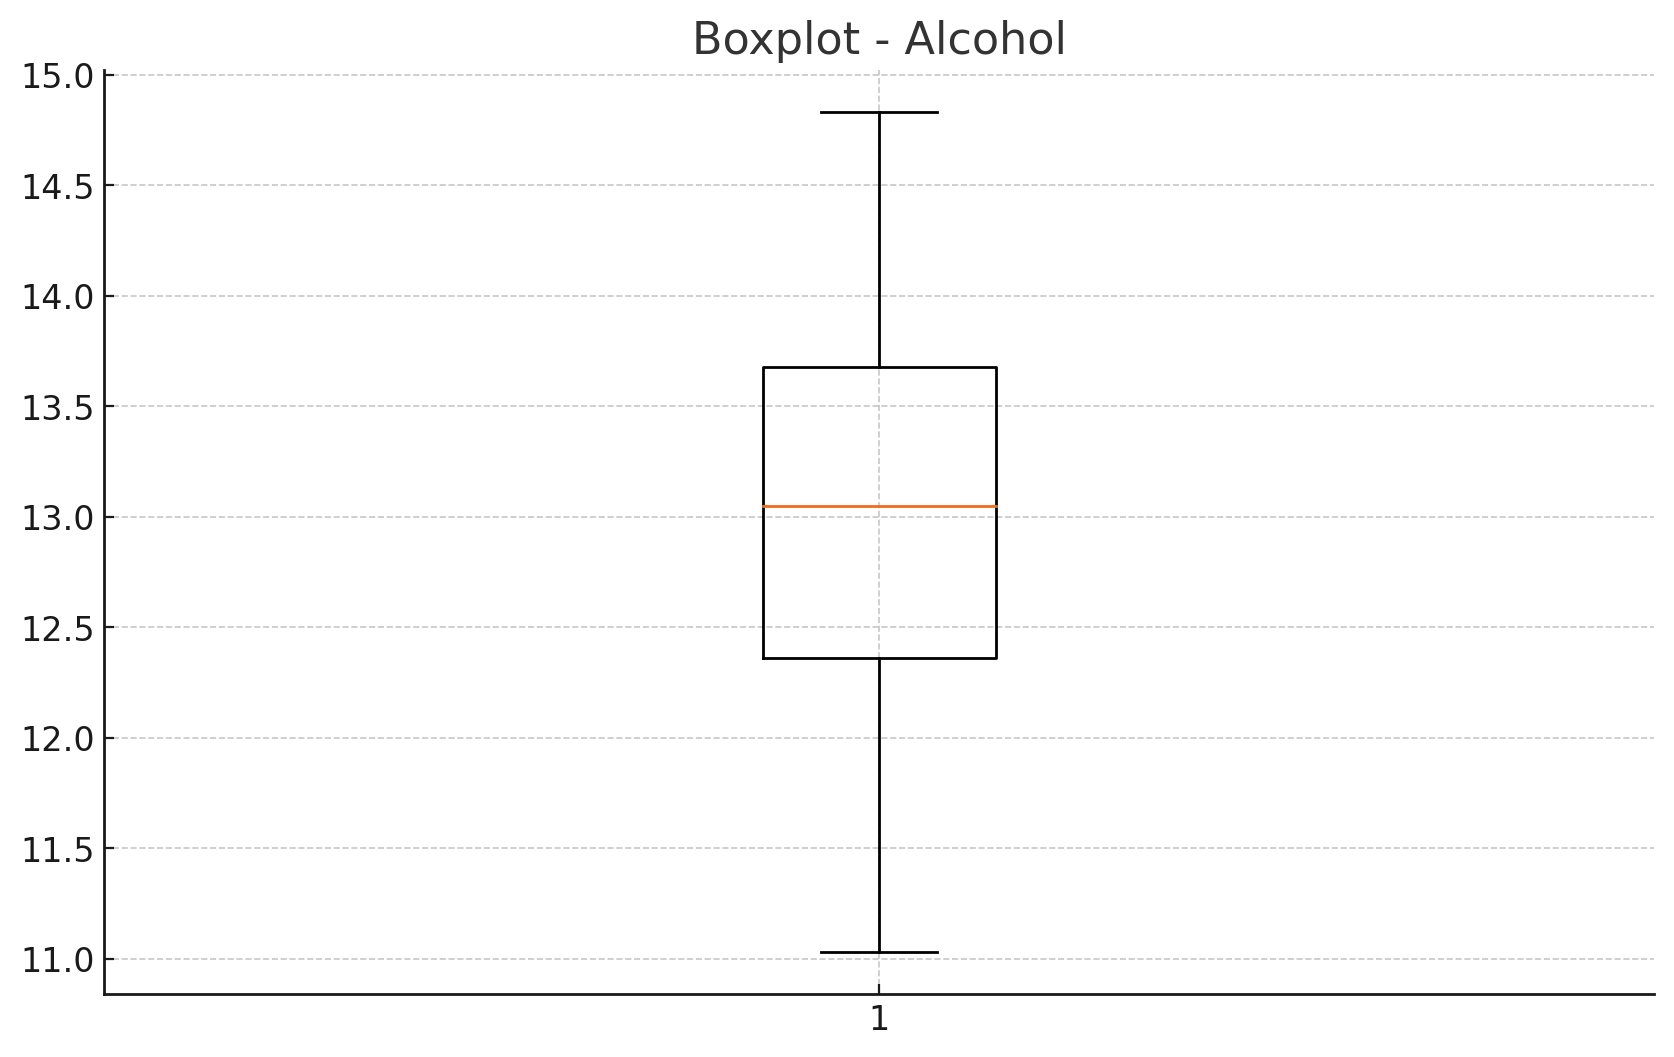

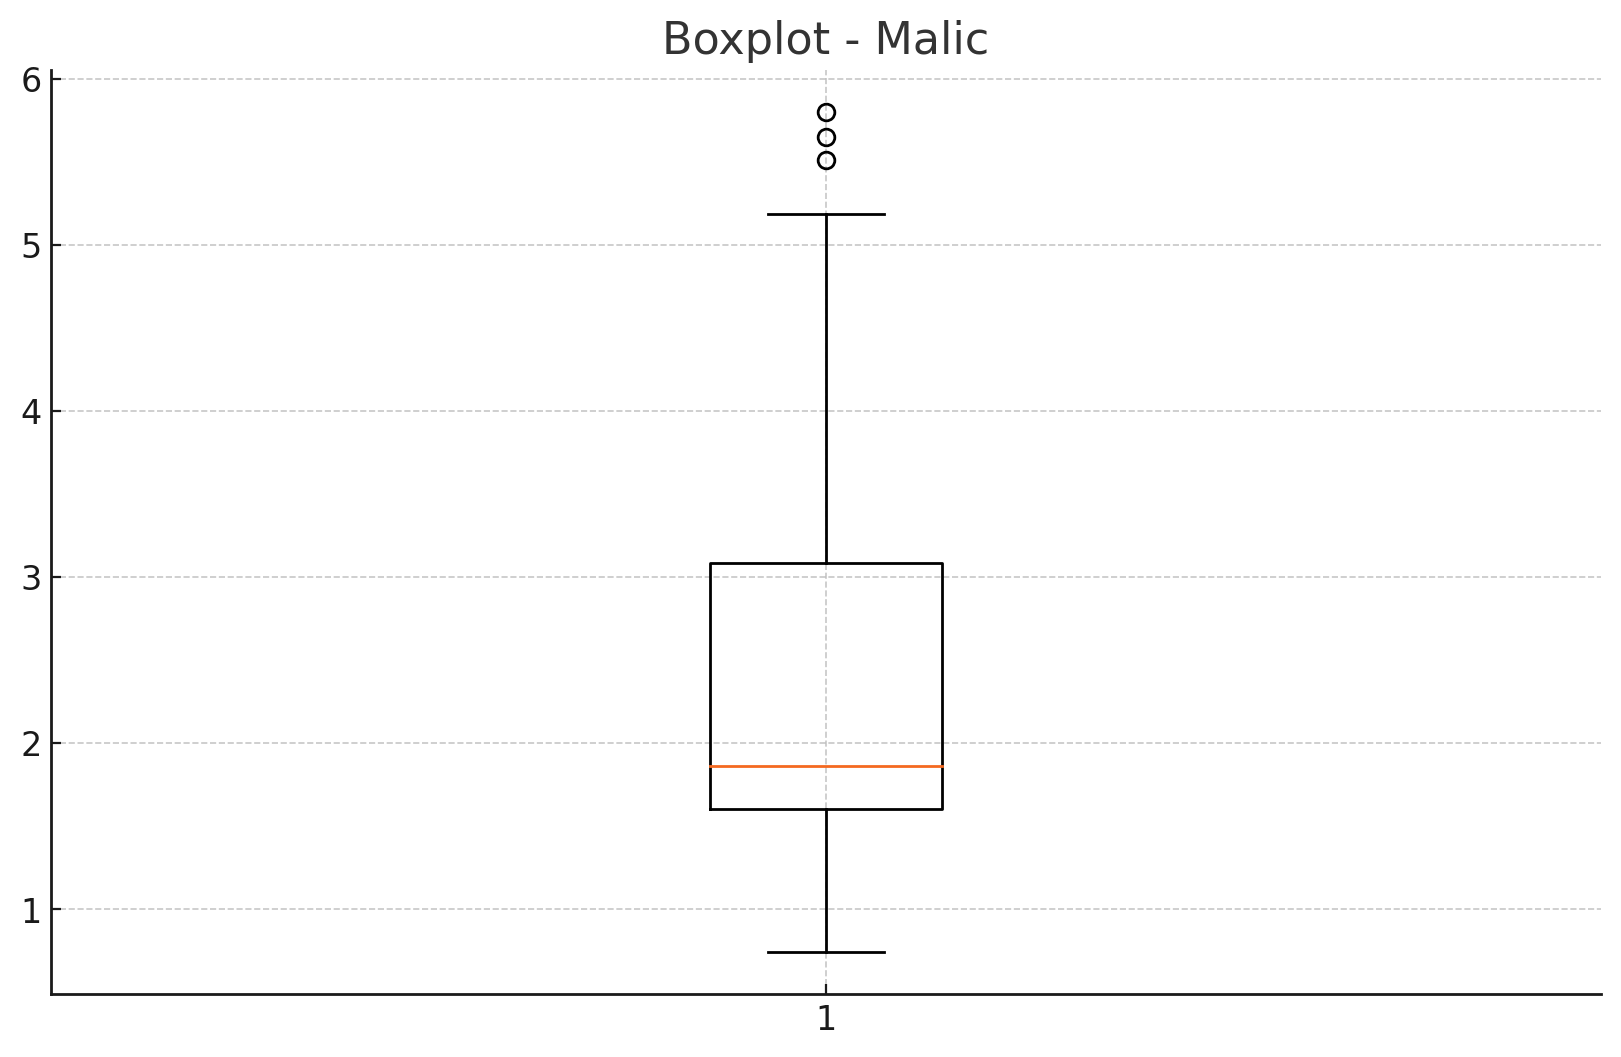

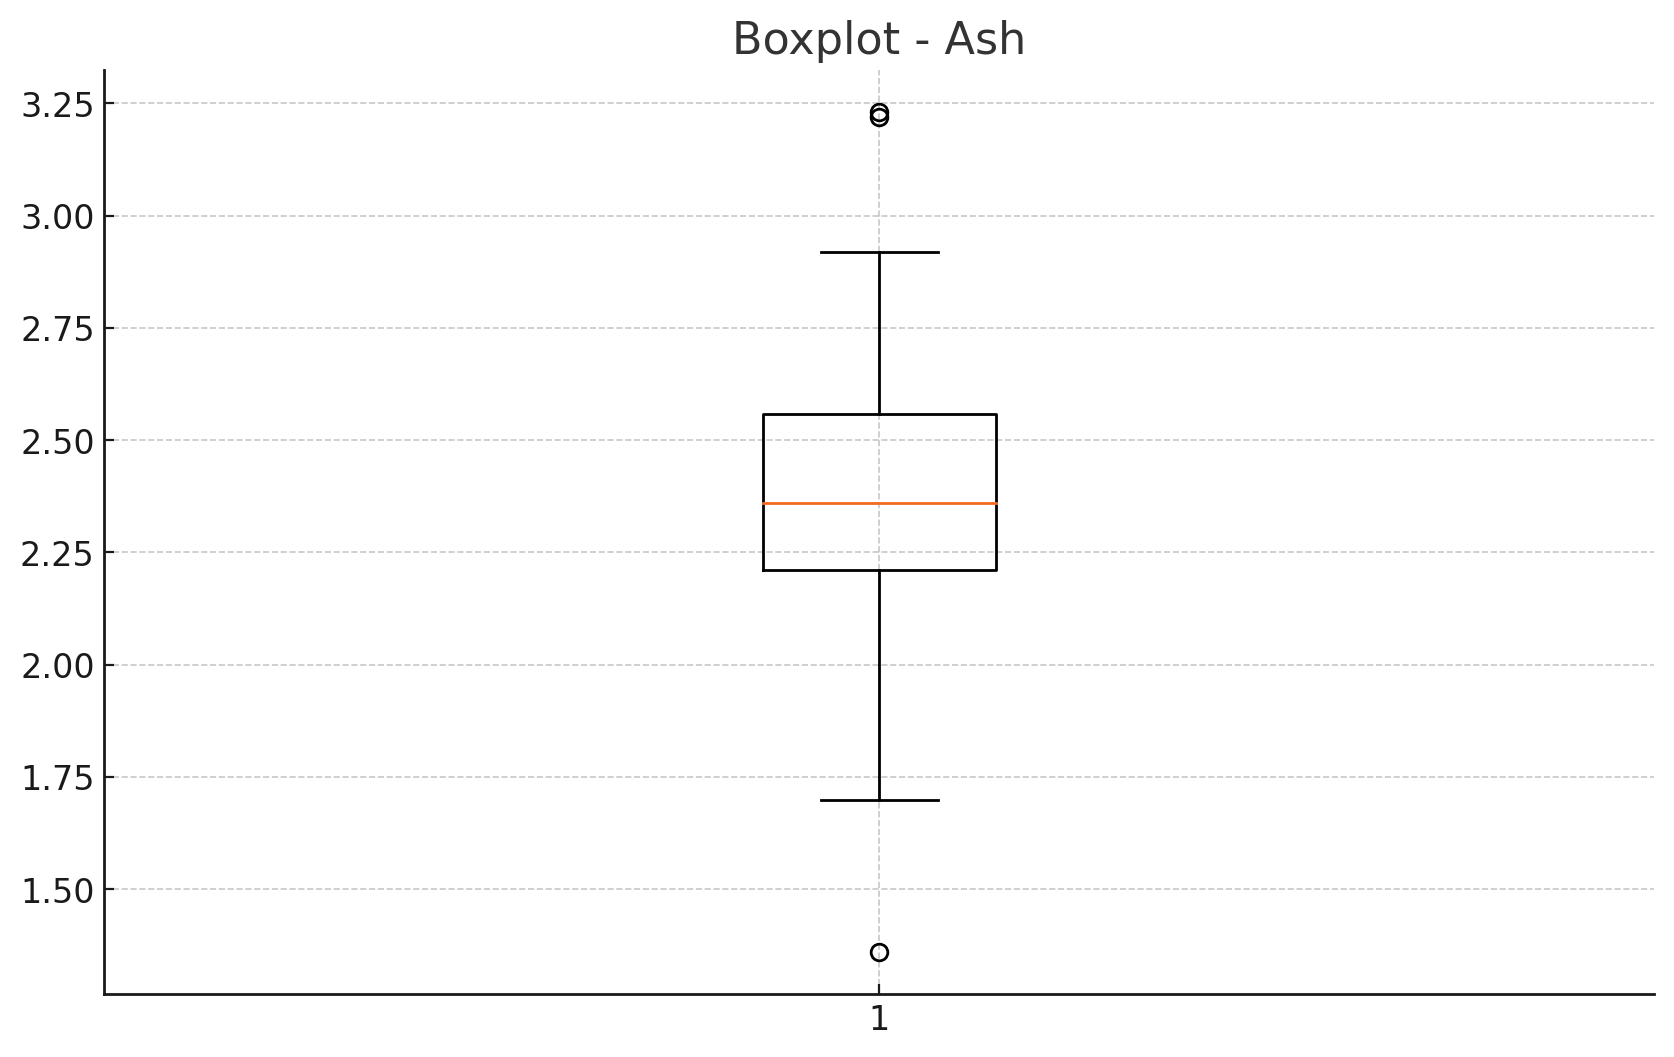

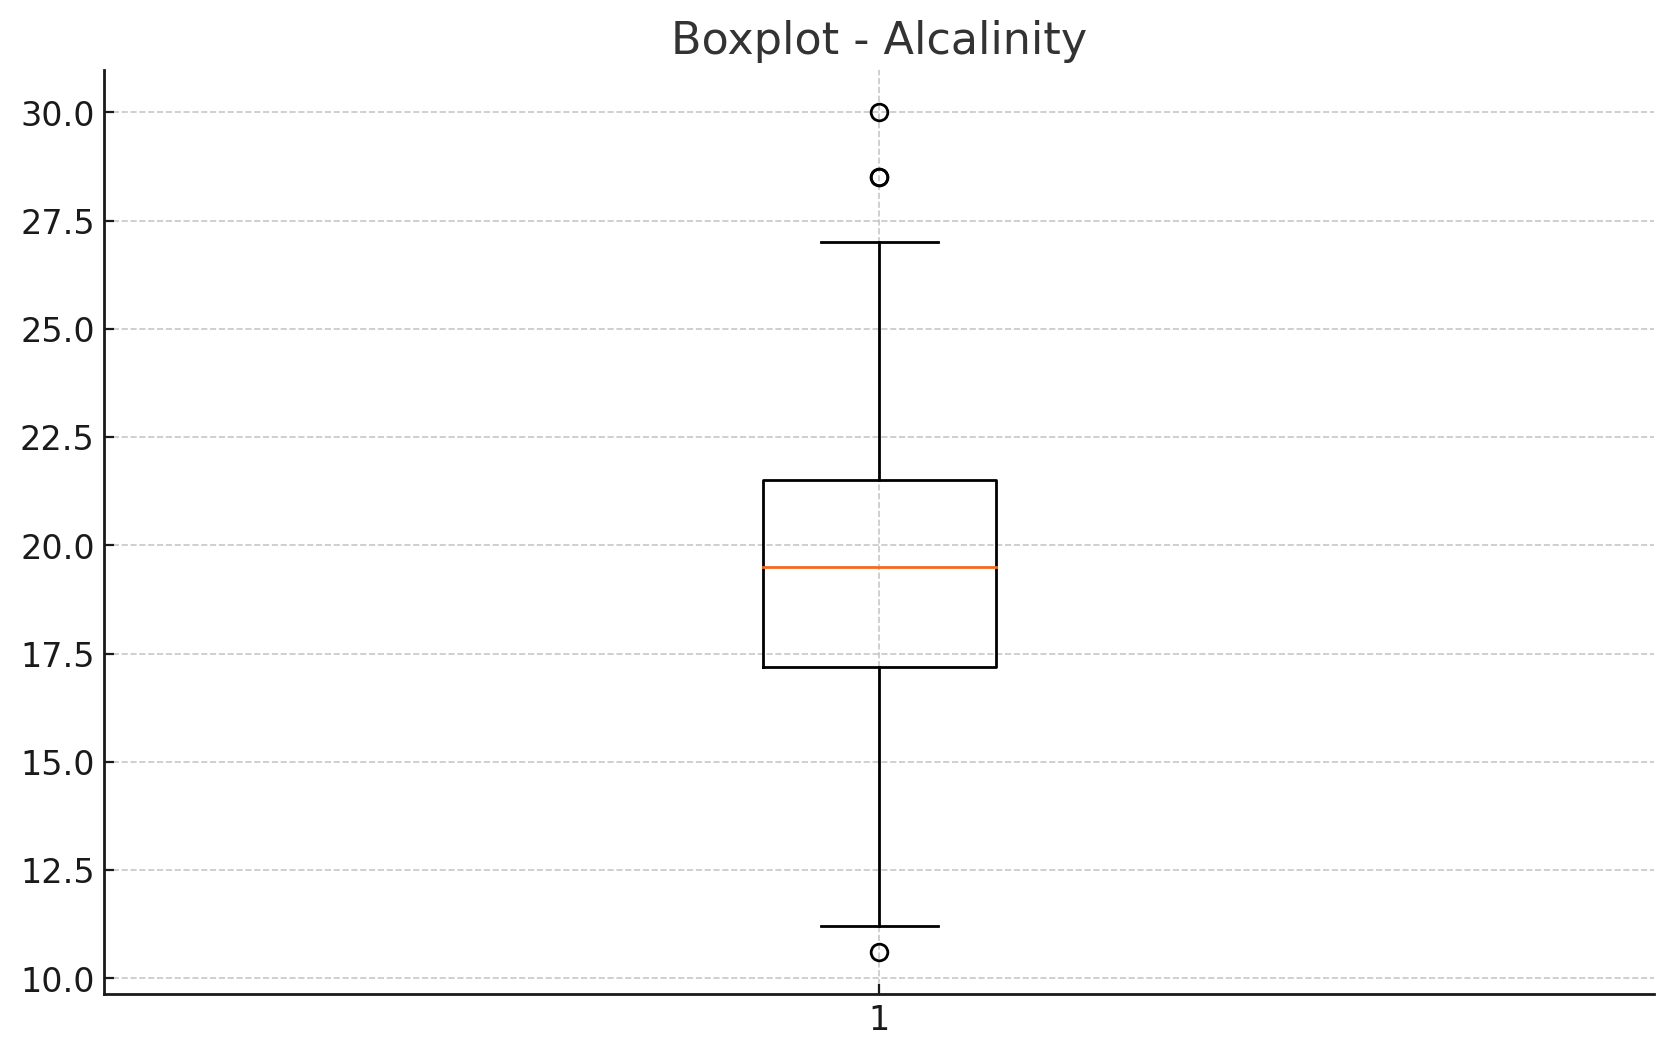

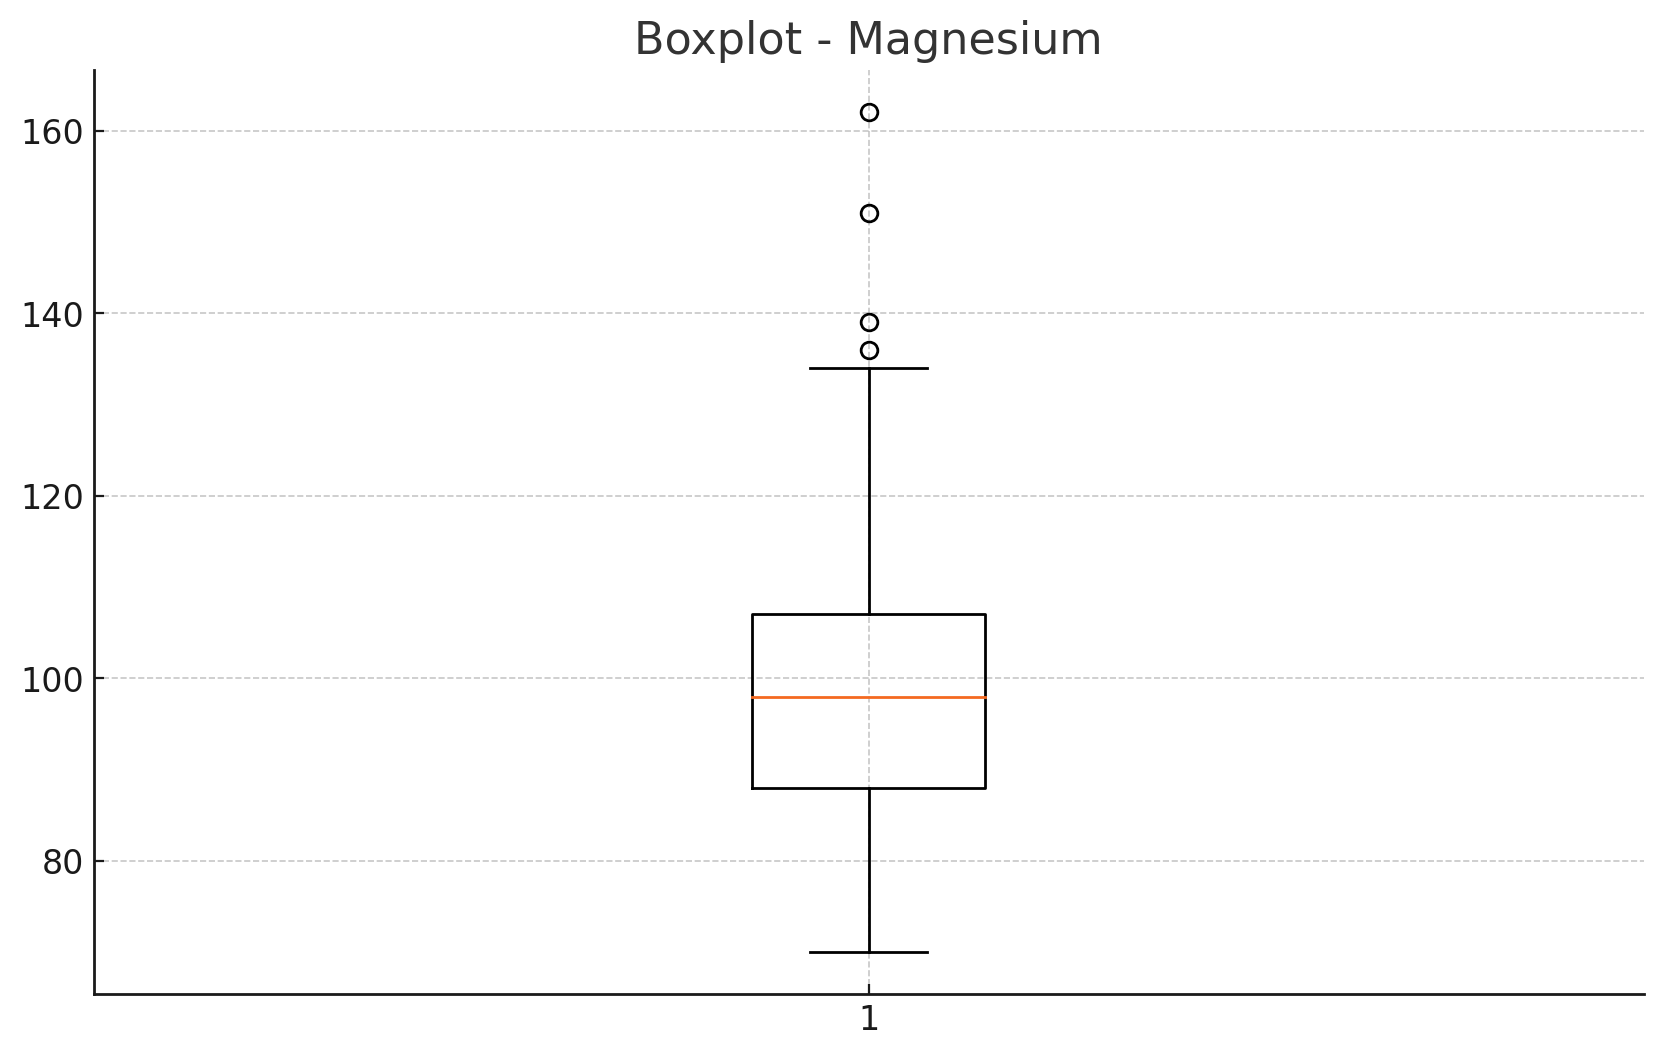

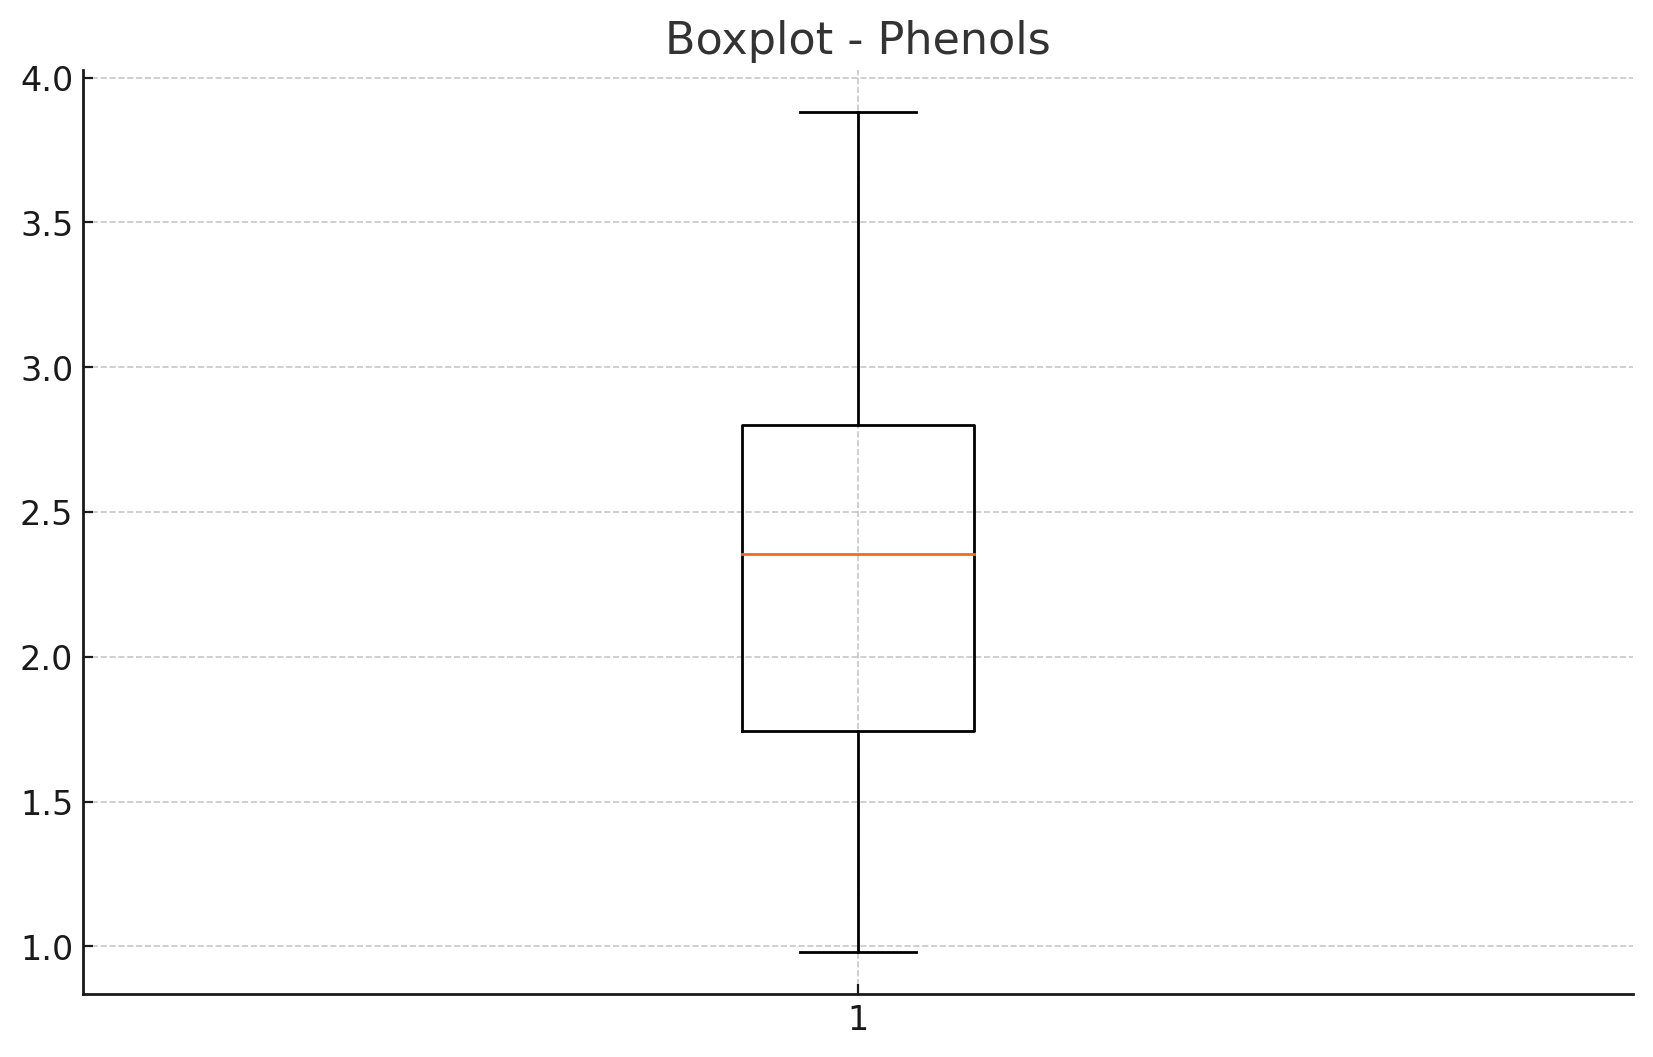

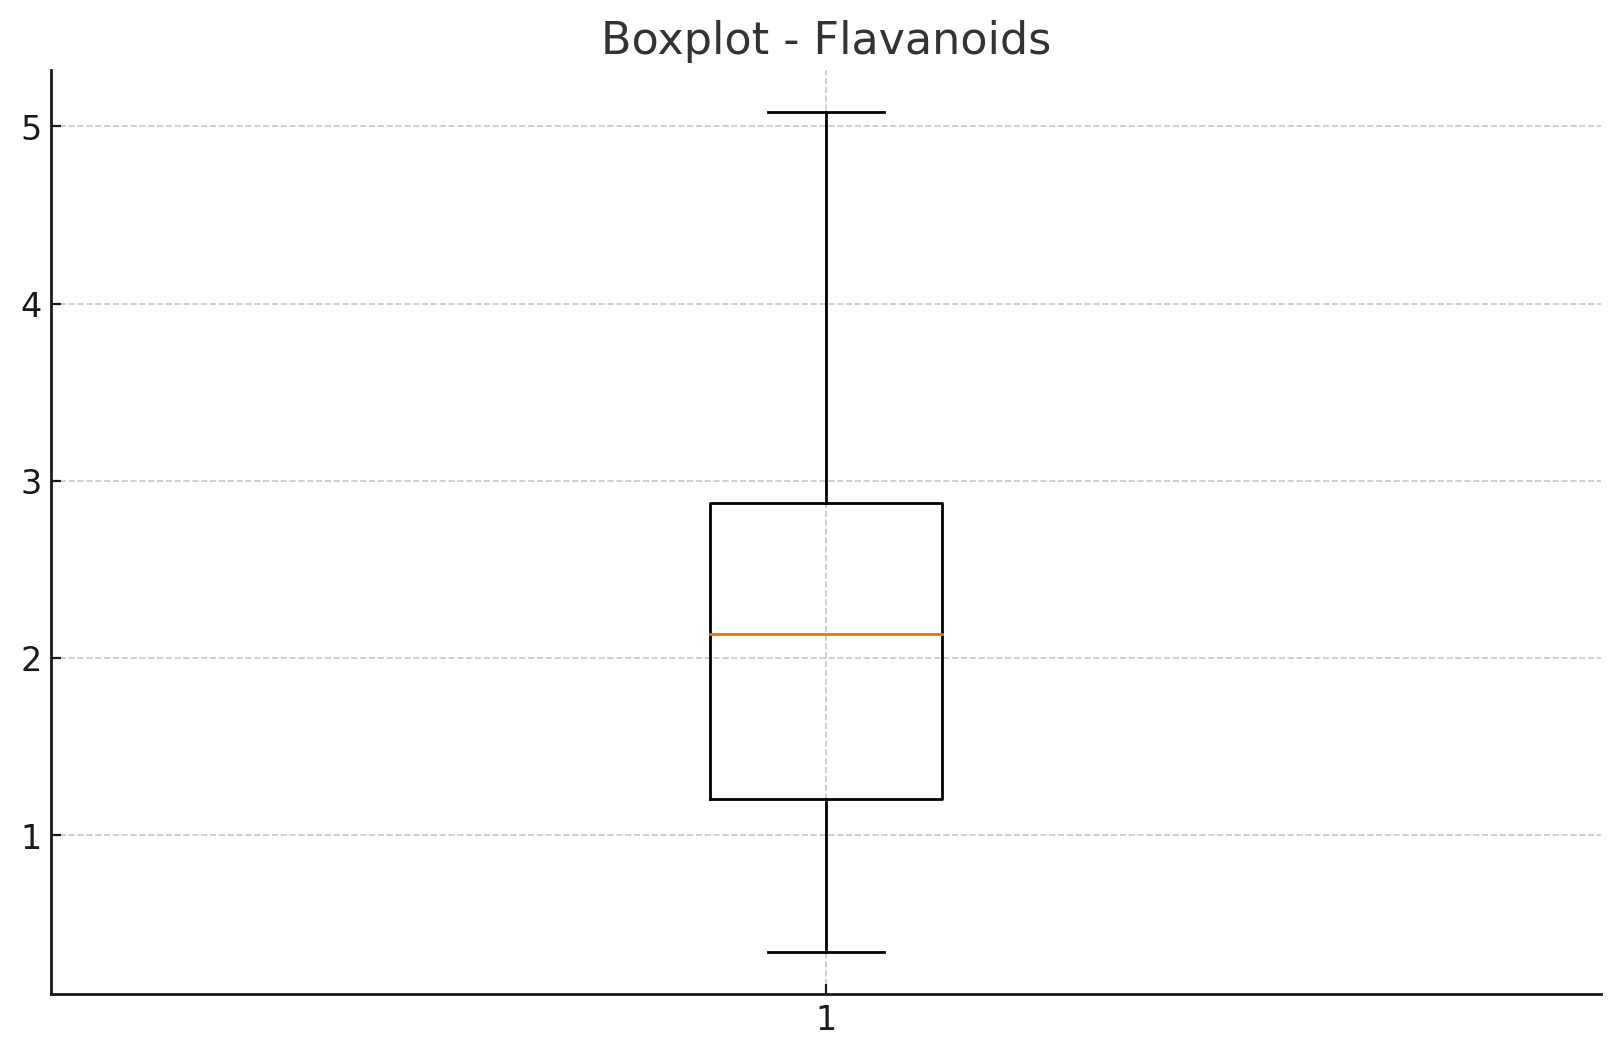

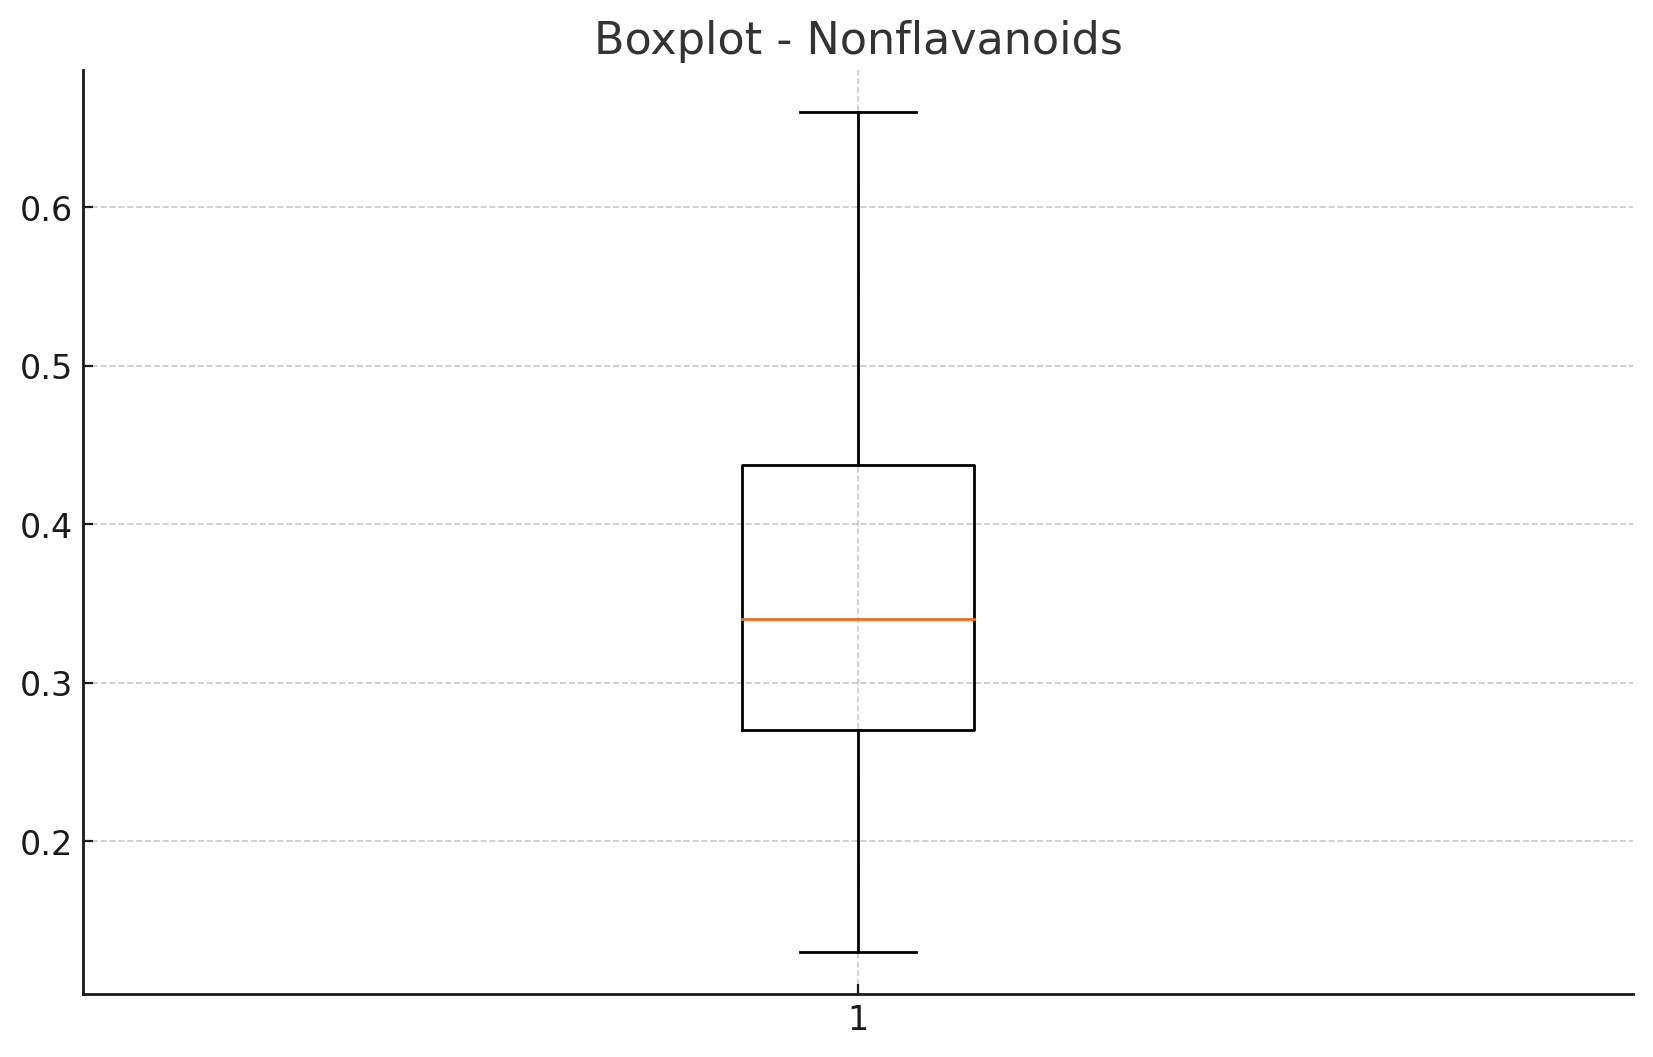

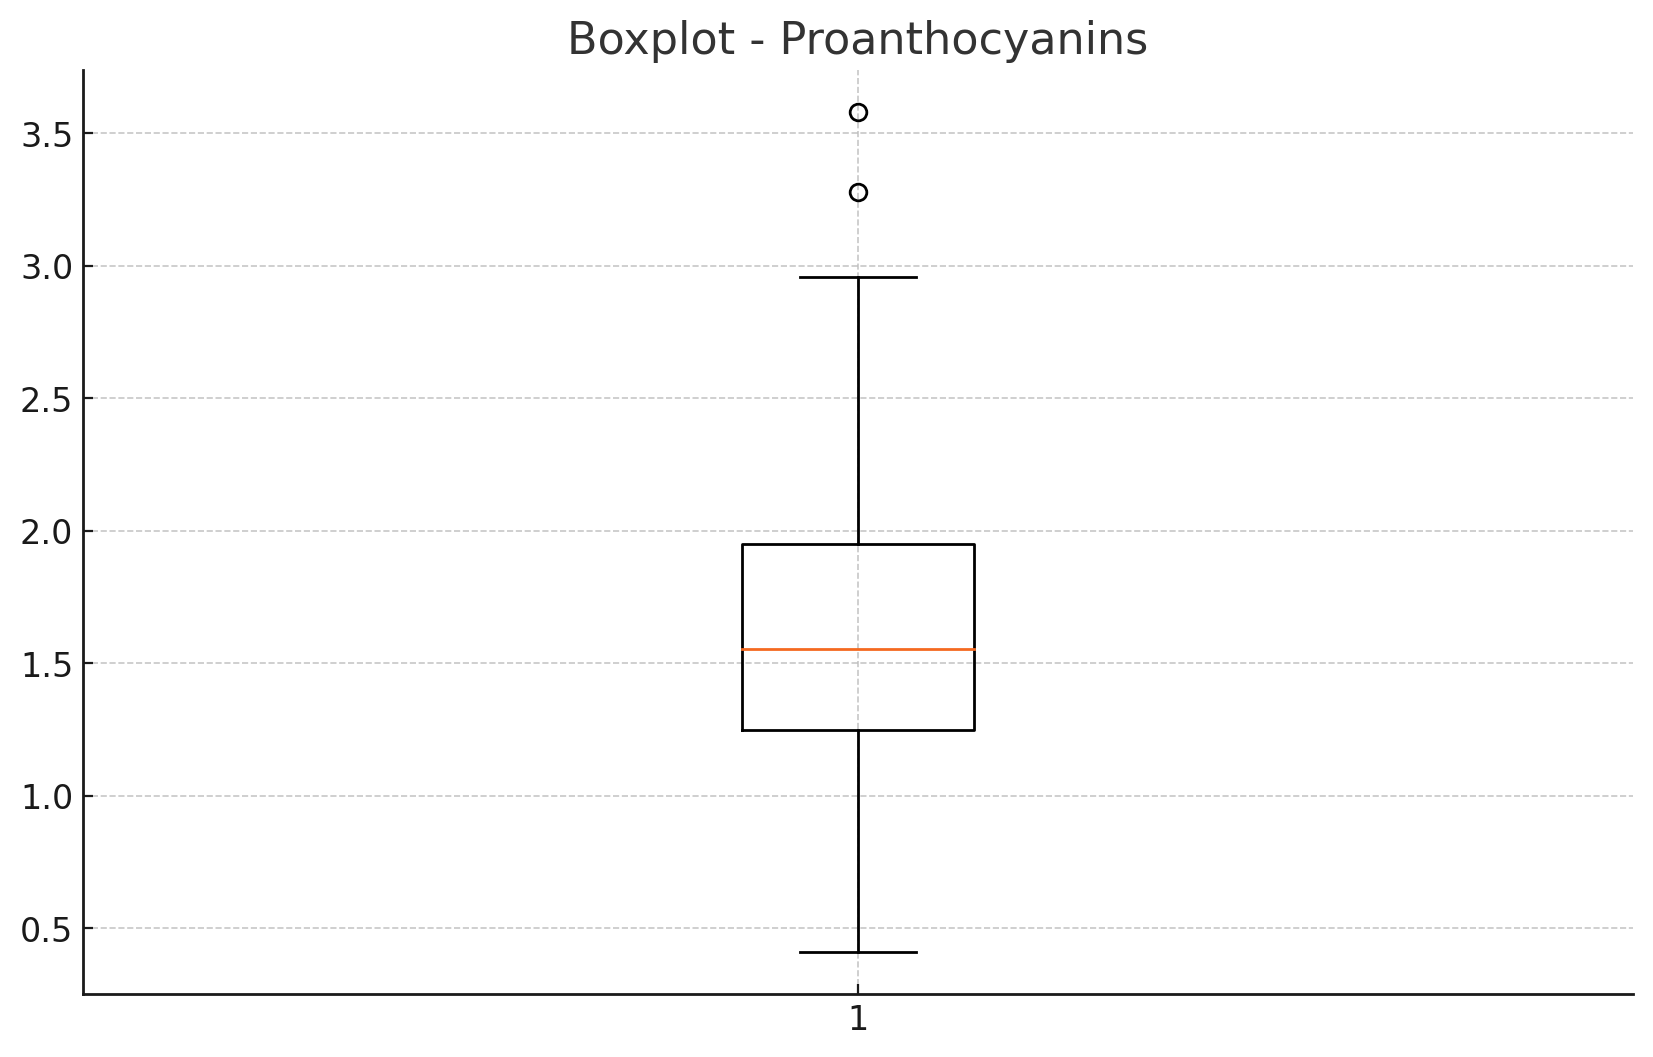

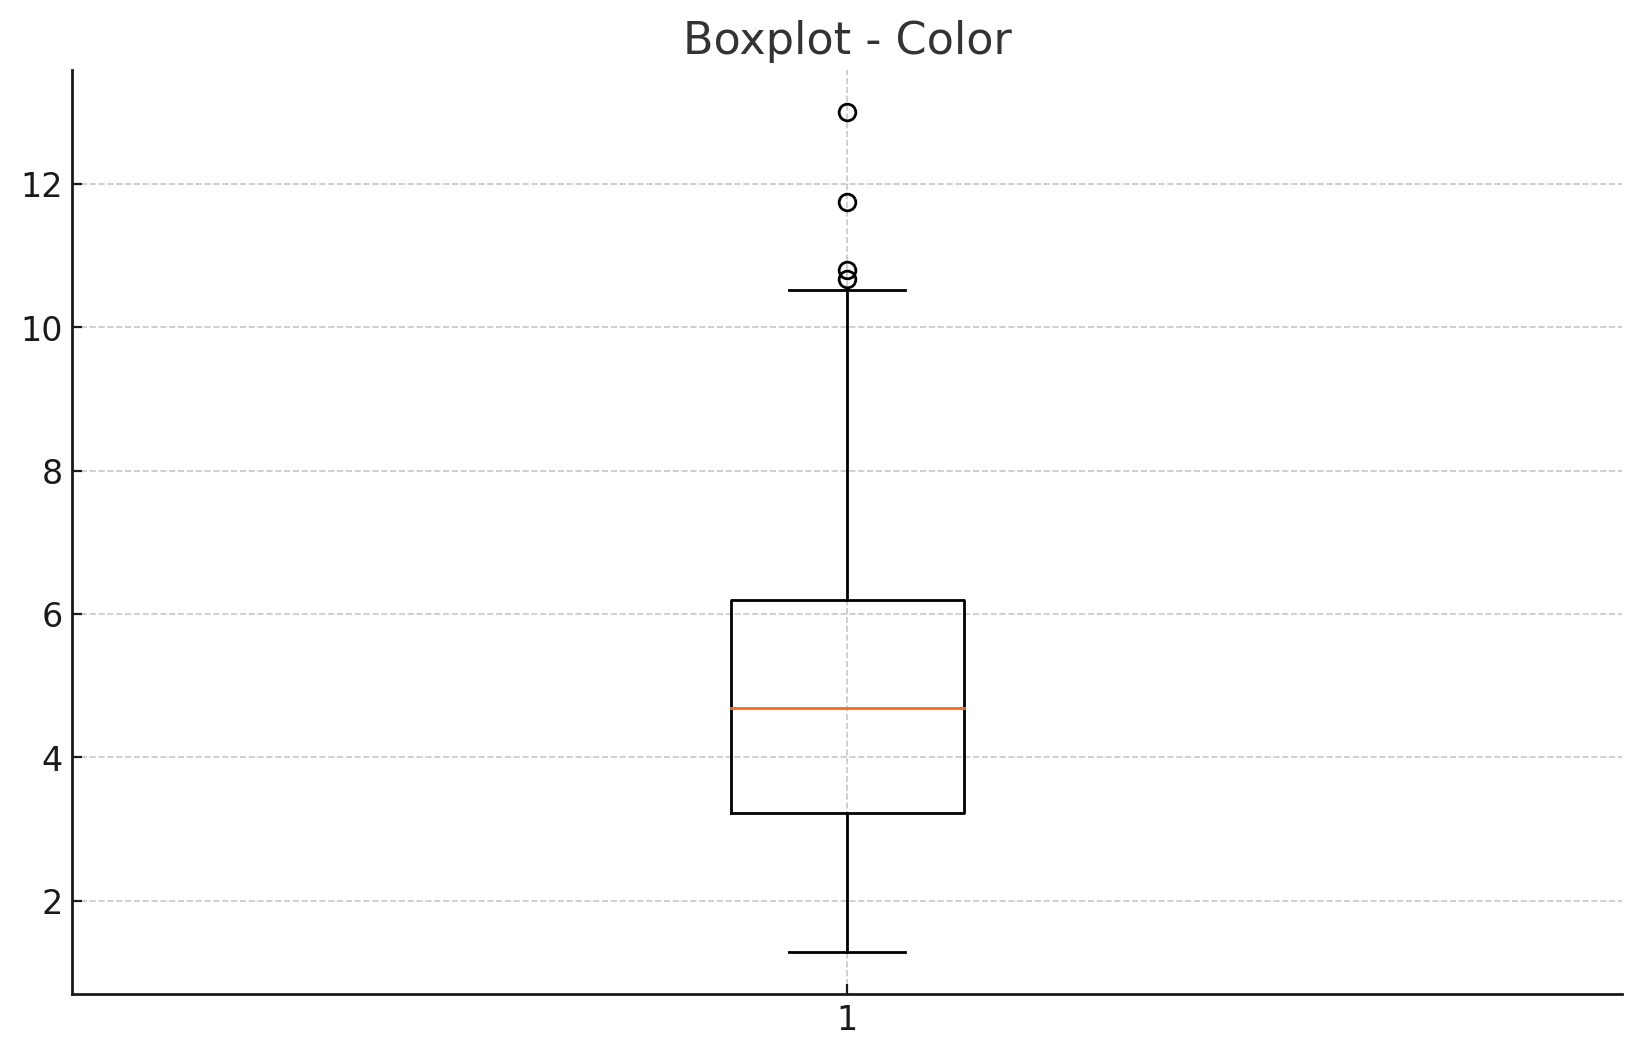

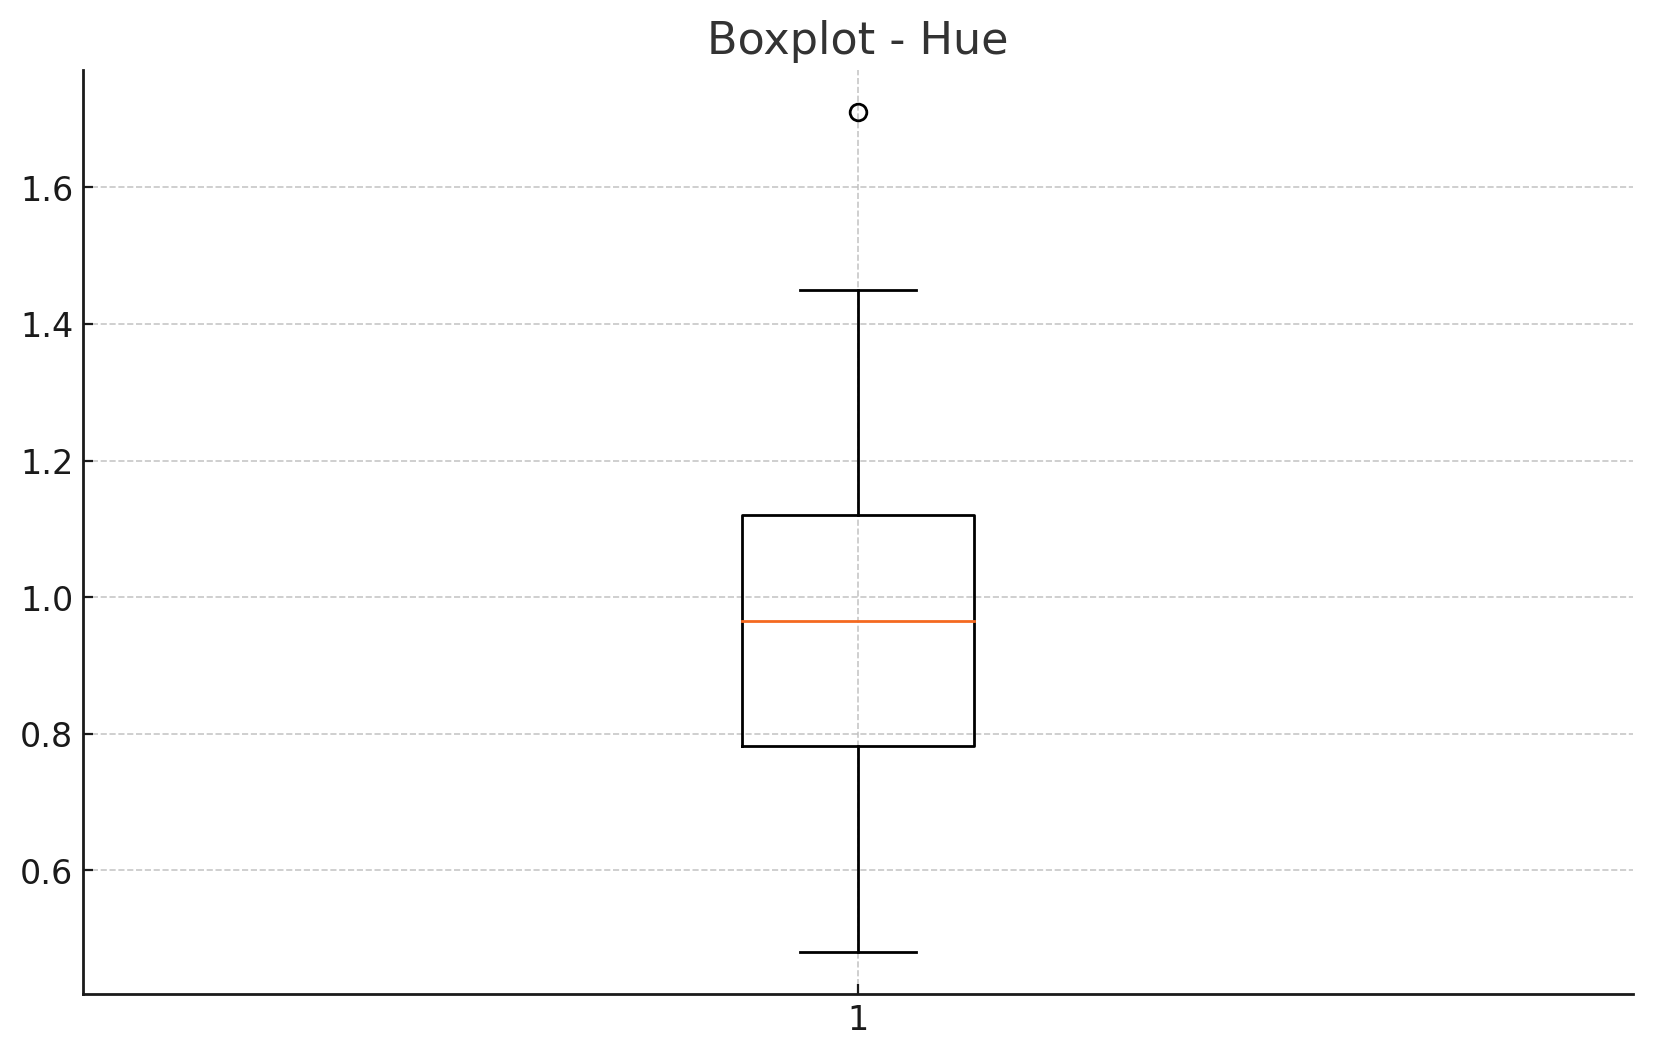

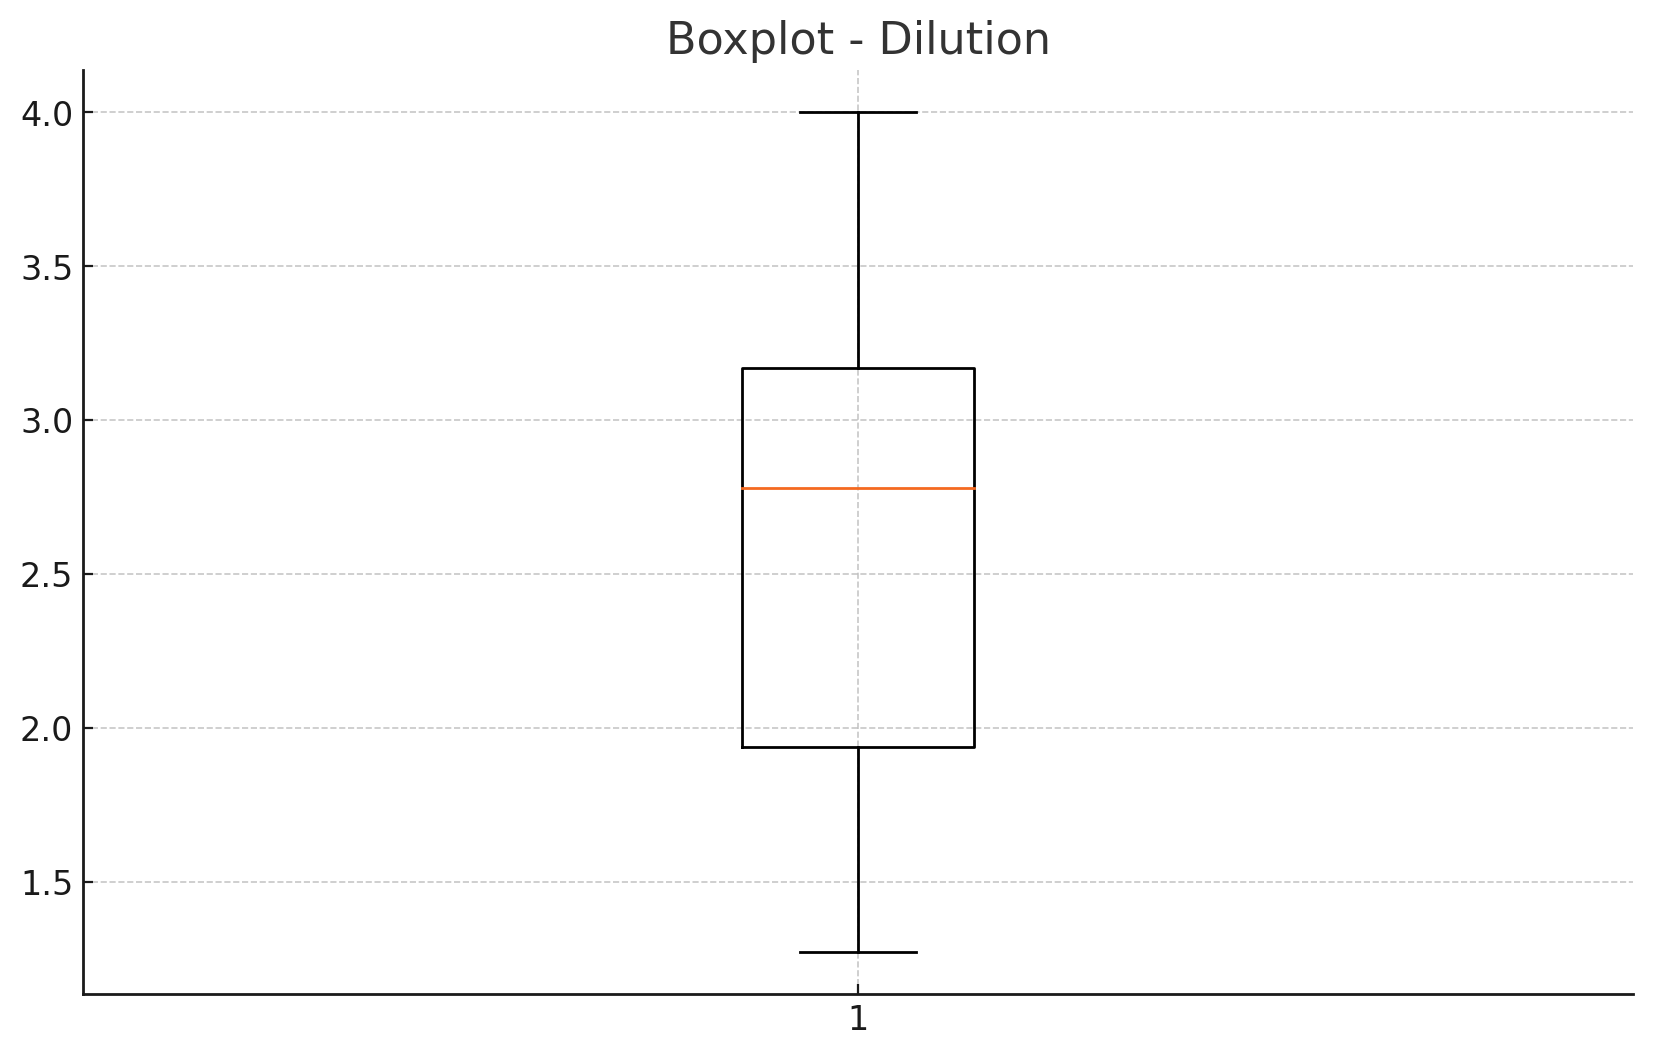

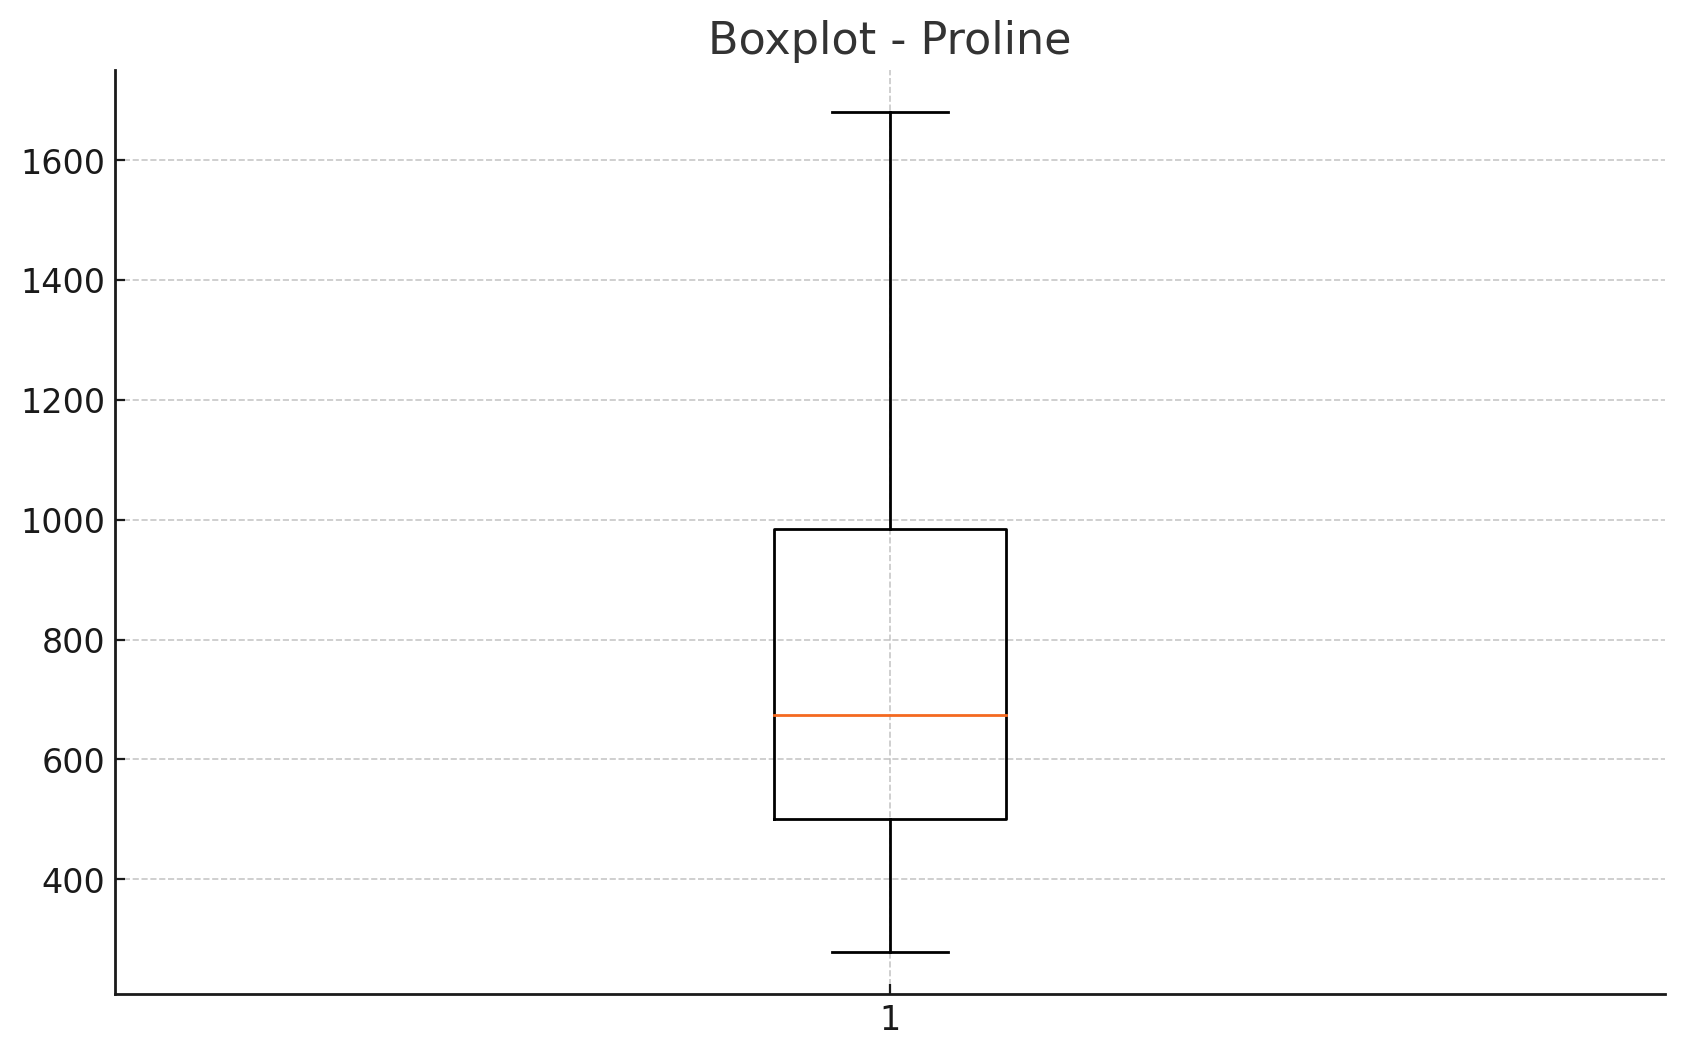

In [4]:
# Histograms
for c in df.columns:
    plt.figure()
    plt.hist(df[c], bins=30)
    plt.title(f"Histogram - {c}")
    plt.show()

# Boxplots
for c in df.columns:
    plt.figure()
    plt.boxplot(df[c])
    plt.title(f"Boxplot - {c}")
    plt.show()

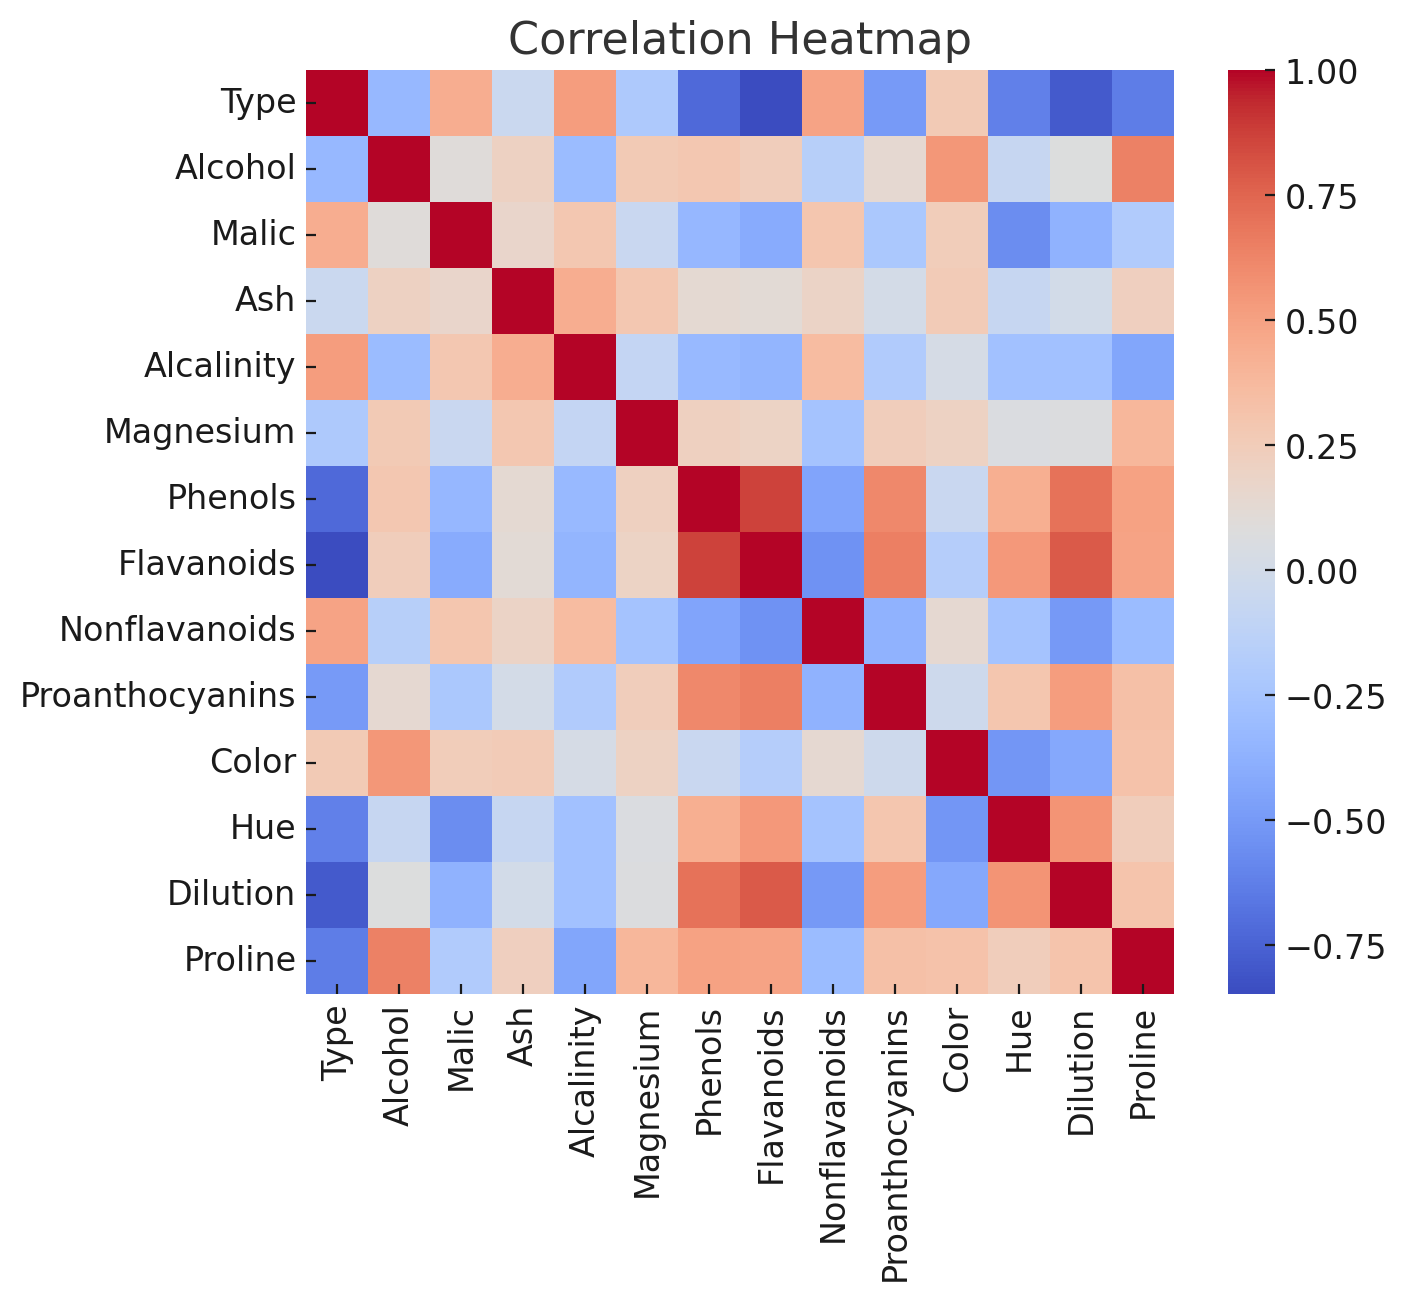

In [5]:
# Correlation heatmap
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Task 2: Dimensionality Reduction with PCA

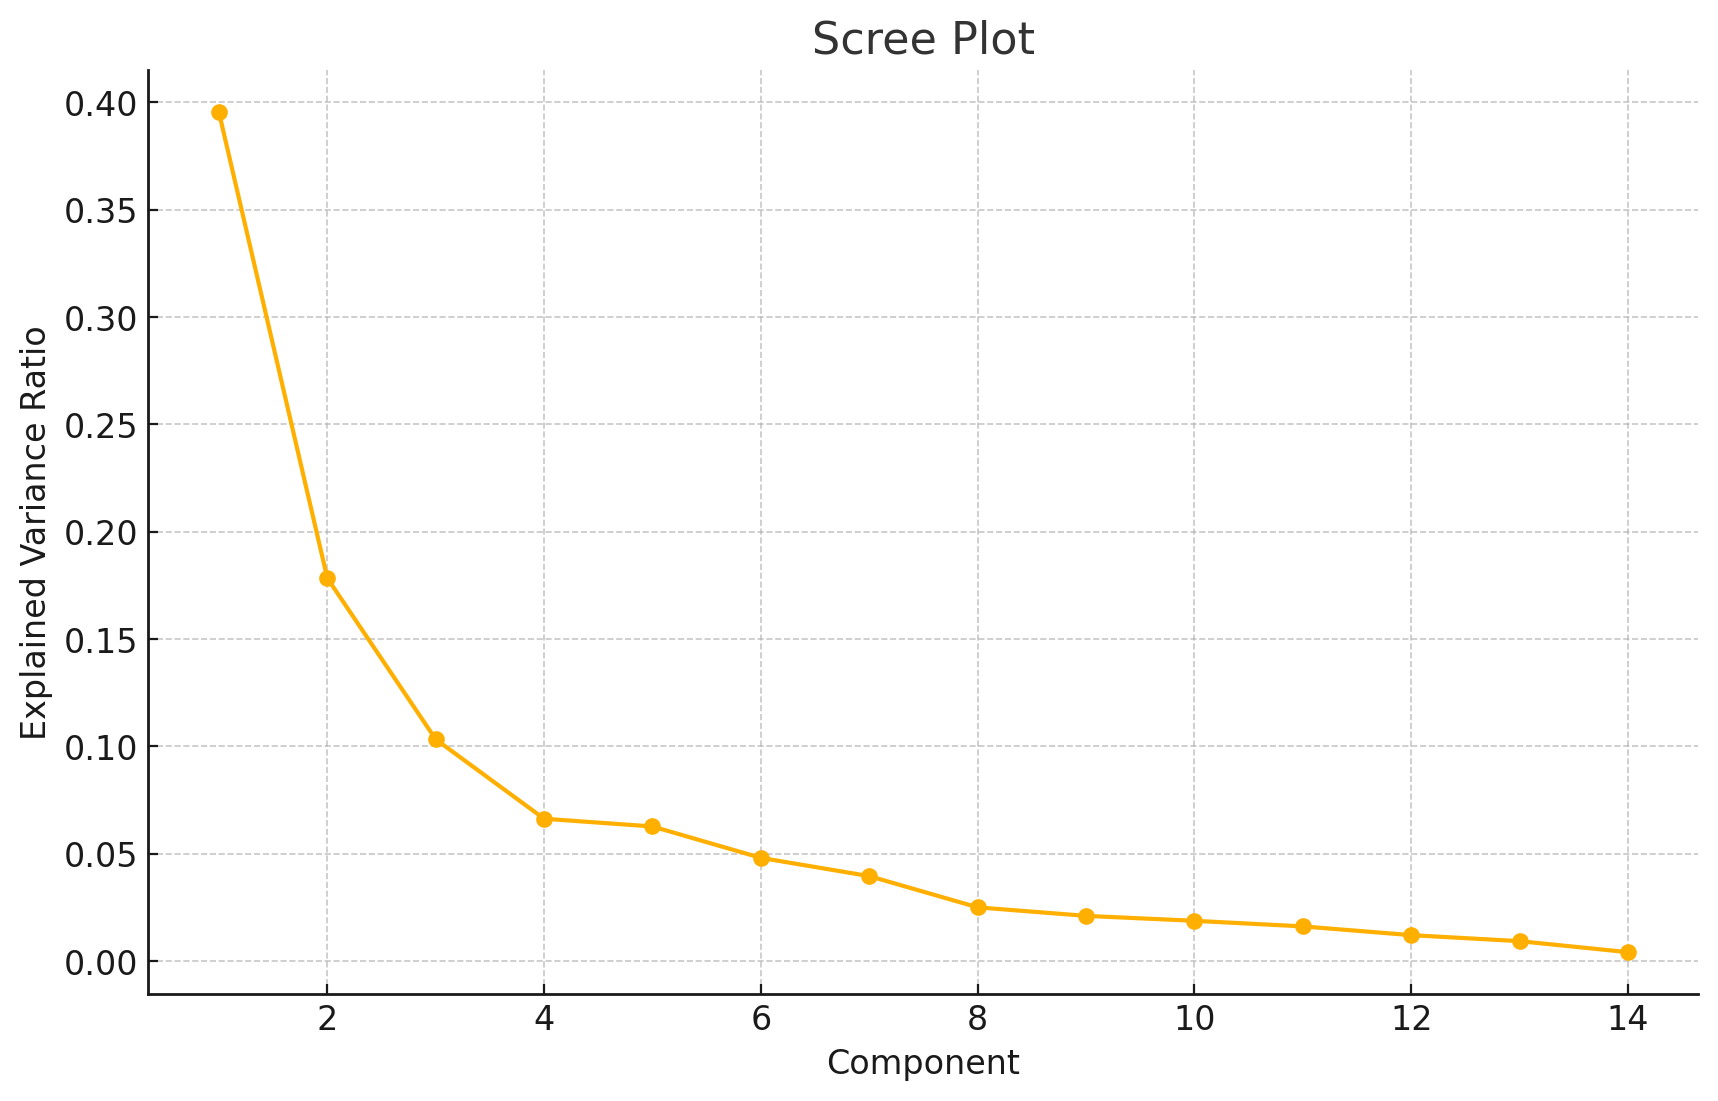

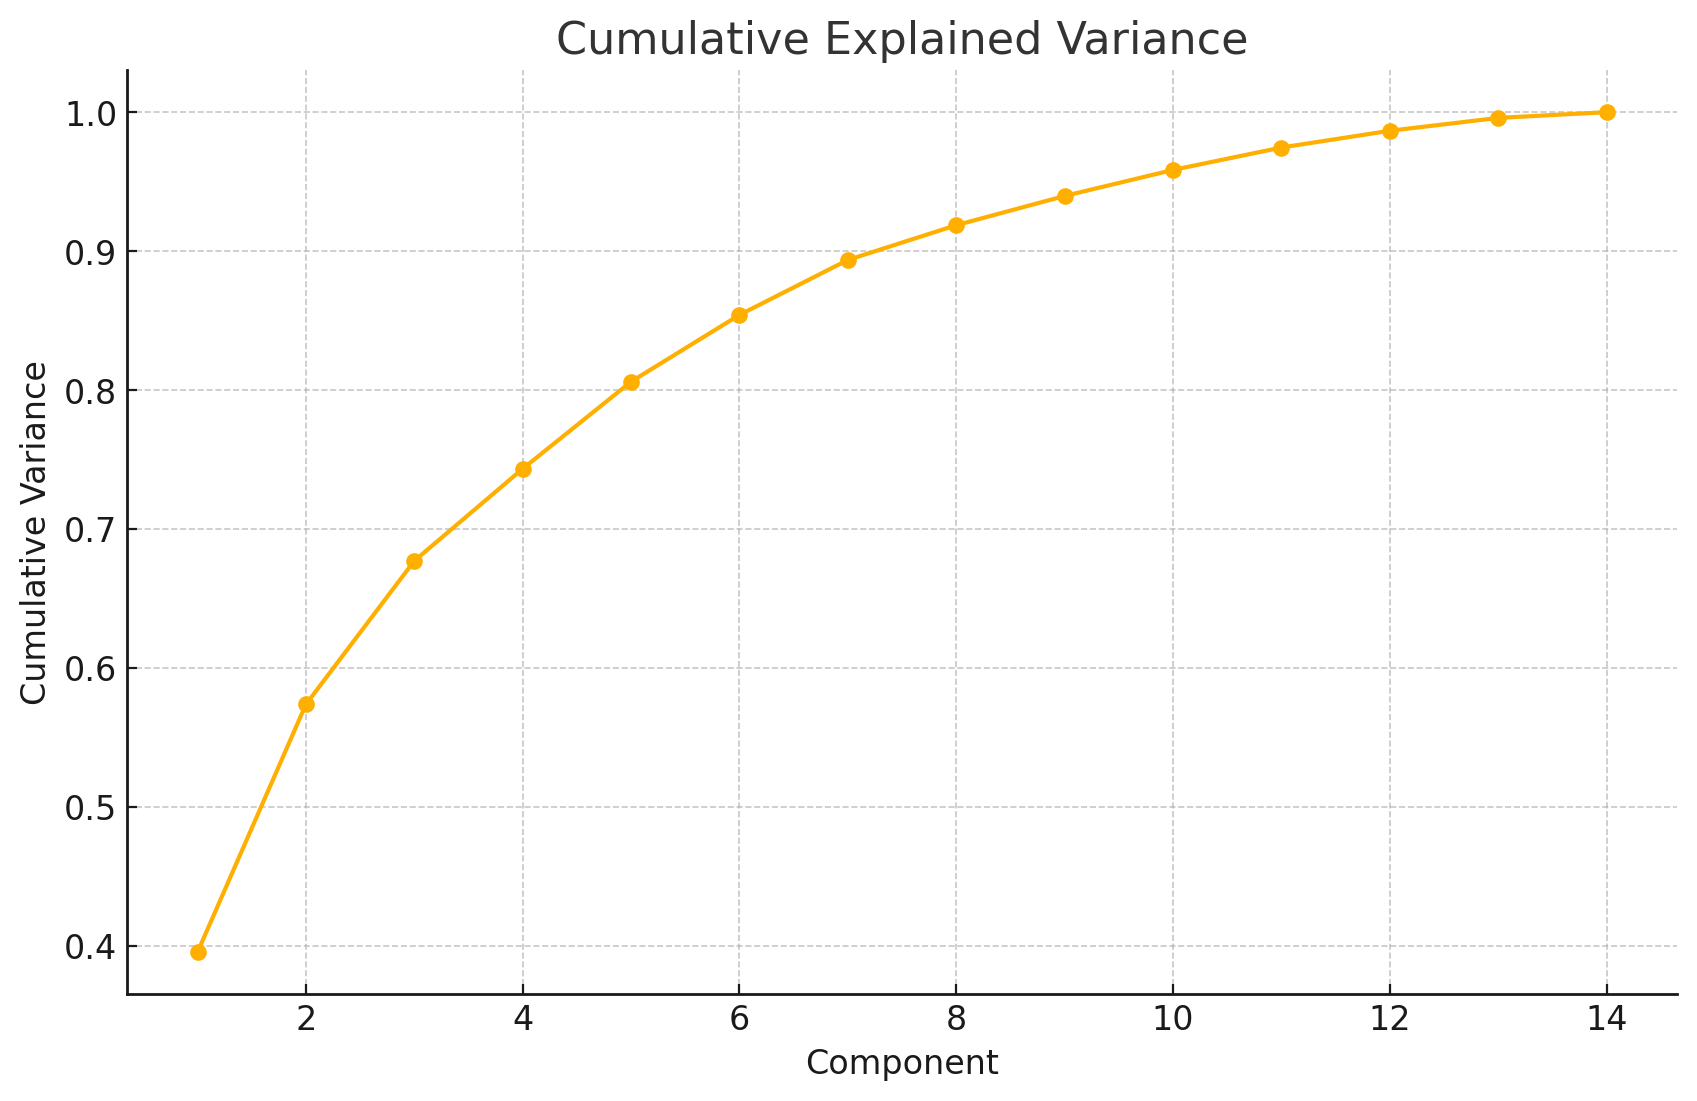

array([[-3.5229339 , -1.45309844],
       [-2.52885806,  0.33001925],
       [-2.78502898, -1.03693595],
       [-3.92258841, -2.76821026],
       [-1.40751111, -0.86777309]])

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

expl_var = pca.explained_variance_ratio_

plt.figure()
plt.plot(range(1, len(expl_var)+1), expl_var, marker='o')
plt.title("Scree Plot")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

plt.figure()
plt.plot(range(1, len(expl_var)+1), expl_var.cumsum(), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Component")
plt.ylabel("Cumulative Variance")
plt.show()

pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_scaled)
X_pca[:5]

## Task 3: Clustering on Original Data

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_o = KMeans(n_clusters=3, random_state=42)
labels_o = kmeans_o.fit_predict(X_scaled)

sil_o = silhouette_score(X_scaled, labels_o)
db_o = davies_bouldin_score(X_scaled, labels_o)

sil_o, db_o

(0.30773604383565206, 1.3163957434114109)

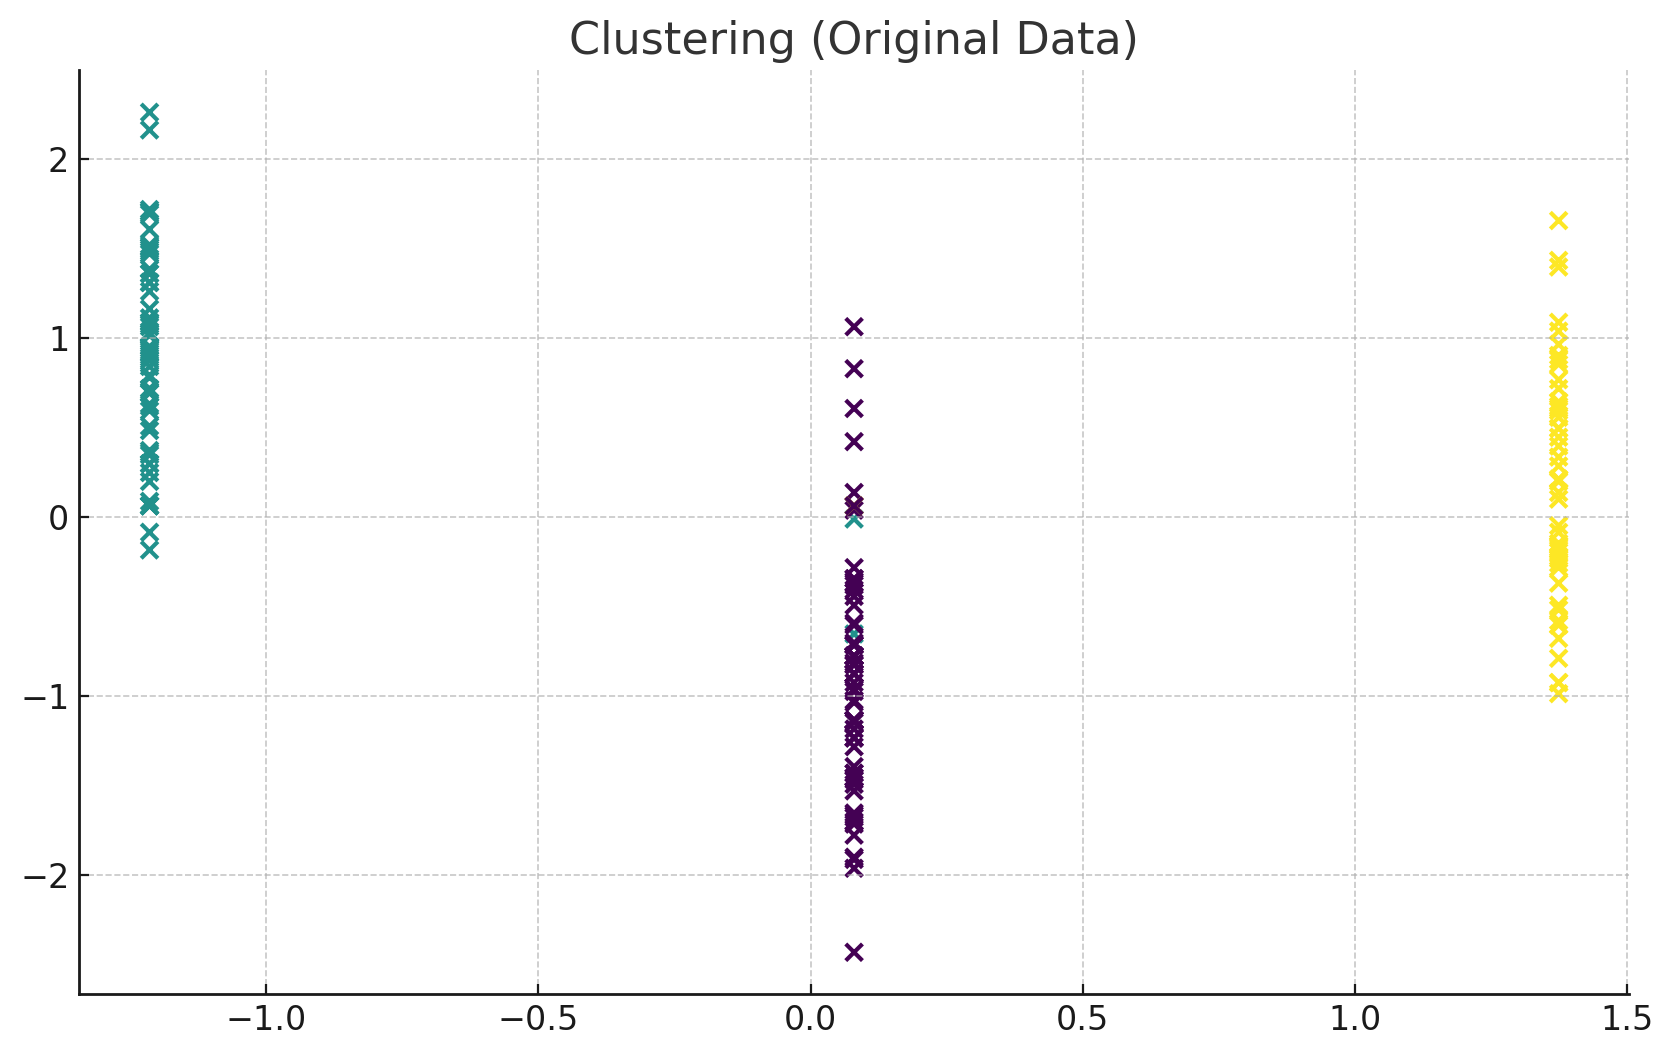

In [8]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_o, cmap='viridis')
plt.title("Clustering (Original Data)")
plt.show()

## Task 4: Clustering on PCA Data

In [9]:
kmeans_p = KMeans(n_clusters=3, random_state=42)
labels_p = kmeans_p.fit_predict(X_pca)

sil_p = silhouette_score(X_pca, labels_p)
db_p = davies_bouldin_score(X_pca, labels_p)

sil_p, db_p

(0.6024415520362845, 0.5397078562575709)

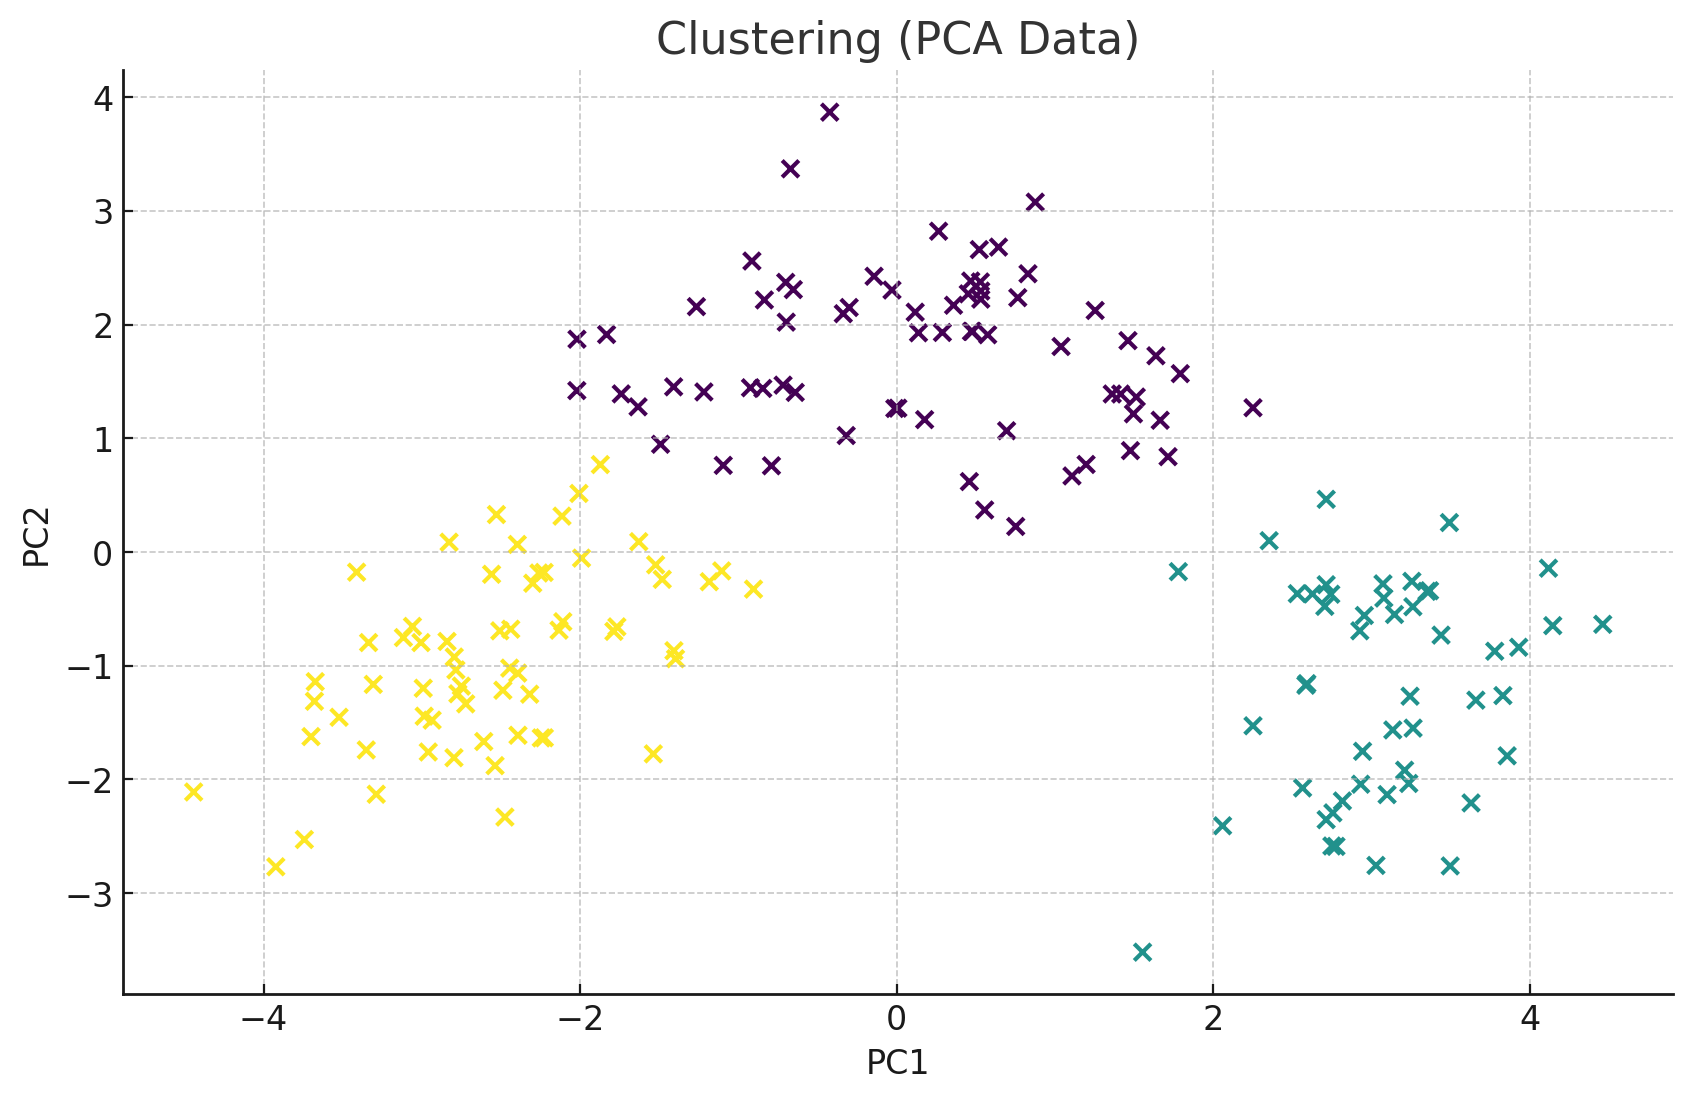

In [10]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_p, cmap='viridis')
plt.title("Clustering (PCA Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Task 5: Comparison & Analysis

In [11]:
import pandas as pd

comparison = pd.DataFrame({
    'Metric':['Silhouette','Davies-Bouldin'],
    'Original Data':[sil_o, db_o],
    'PCA Data':[sil_p, db_p]
})
comparison

,Metric,Original Data,PCA Data
0,Silhouette,0.307736,0.602442
1,Davies-Bouldin,1.316396,0.539708


## Task 6: Conclusion & Insights
- PCA reduces dimensionality and can improve clustering visualization.
- PCA may improve or reduce cluster separation depending on dataset.
- Use PCA when data has multicollinearity or many features.